In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np
import pandas as pd
# For Visualisation-import ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# To Scale our data/ For preprocessing the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

#To check Multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#To Split data
from sklearn.model_selection import train_test_split,GridSearchCV

# Import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,accuracy_score

### 1.1 Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it.

In [3]:
#Read dataset
df = pd.read_excel('Election_Data.xlsx',sheet_name="Election_Dataset_Two Classes")
df.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [4]:
df.tail()

Unnamed: 0          vote  age  economic.cond.national  \
1520        1521  Conservative   67                       5   
1521        1522  Conservative   73                       2   
1522        1523        Labour   37                       3   
1523        1524  Conservative   61                       3   
1524        1525  Conservative   74                       2   

      economic.cond.household  Blair  Hague  Europe  political.knowledge  \
1520                        3      2      4      11                    3   
1521                        2      4      4       8                    2   
1522                        3      5      4       2                    2   
1523                        3      1      4      11                    2   
1524                        3      2      4      11                    0   

      gender  
1520    male  
1521    male  
1522    male  
1523    male  
1524  female

In [5]:
# Drop Unwanted column from the dataset
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
df.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1525.0  54.182295  15.711209  24.0  41.0  53.0  67.0   
economic.cond.national   1525.0   3.245902   0.880969   1.0   3.0   3.0   4.0   
economic.cond.household  1525.0   3.140328   0.929951   1.0   3.0   3.0   4.0   
Blair                    1525.0   3.334426   1.174824   1.0   2.0   4.0   4.0   
Hague                    1525.0   2.746885   1.230703   1.0   2.0   2.0   4.0   
Europe                   1525.0   6.728525   3.297538   1.0   4.0   6.0  10.0   
political.knowledge      1525.0   1.542295   1.083315   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

In [9]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 8


vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [10]:
#Dropping the duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [11]:
df.reset_index(drop = True, inplace = True)

In [12]:
print("the no of rows ",df.shape[0]," ", "the no of colums ",df.shape[1])

the no of rows  1517   the no of colums  9


In [13]:
#Checking Null values
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [14]:
# Number Summary for object data type:
df[['vote','gender']].describe()

vote  gender
count     1517    1517
unique       2       2
top     Labour  female
freq      1057     808

In [15]:
df.vote.value_counts()

vote
Labour          1057
Conservative     460
Name: count, dtype: int64

In [16]:
for column in df[['vote', 'economic.cond.national', 'economic.cond.household','Blair','Hague','Europe','political.knowledge','gender' ]]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

VOTE :  2
vote
Conservative     460
Labour          1057
Name: count, dtype: int64


ECONOMIC.COND.NATIONAL :  5
economic.cond.national
1     37
5     82
2    256
4    538
3    604
Name: count, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
economic.cond.household
1     65
5     92
2    280
4    435
3    645
Name: count, dtype: int64


BLAIR :  5
Blair
3      1
1     97
5    152
2    434
4    833
Name: count, dtype: int64


HAGUE :  5
Hague
3     37
5     73
1    233
4    557
2    617
Name: count, dtype: int64


EUROPE :  11
Europe
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: count, dtype: int64


POLITICAL.KNOWLEDGE :  4
political.knowledge
1     38
3    249
0    454
2    776
Name: count, dtype: int64


GENDER :  2
gender
male      709
female    808
Name: count, dtype: int64




Age: Minimum age is 24; Maximum age is 93; Avg age is 54.18; Age feature has some amount of skewness present.

vote: Majority of the electors choose to vote Labour party: 1063 out of 152.

gender: Female voters found to be more compared to male voters: 812 female out of 1525.

### From the above analysis, I can see that:
1. The dataset originally had 1529 rows and 10 columns.
2. The unnecessary column named "Unnamed" was dropped.
3. There are 2 categorical columns and 7 numeric columns in the dataset.
4. No null values are present in the Dataset.
5. There are 8 duplicate rows in the Dataset.
6. After dropping the duplicate rows and unwanted column, there are 1517 rows and 9 columns in the daaset.


- Data quality: No instances of "bad" or corrupt data were found.

- Economic condition ratings: Both national and household levels lean positively towards Tony Blair (ratings >3), indicating public approval of his economic stewardship.

- Leadership perception: William Hague's rating falls below the neutral score, signifying less public confidence in his leadership.

#### 1.2 Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers.

### Univariate Analysis

In [17]:
#Creating categorical & Numeric dataset from it
cat = []
num = []
for i in df.columns:
  if df[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)

In [18]:
cat

['vote', 'gender']

In [19]:
num

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

In [20]:
ord = []
for i in num:
  if i != 'age':
    ord.append(i)
print(ord)

['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


Age Description
count    1517.00
mean       54.24
std        15.70
min        24.00
25%        41.00
50%        53.00
75%        67.00
max        93.00
Name: age, dtype: float64
Skewness = 0.14


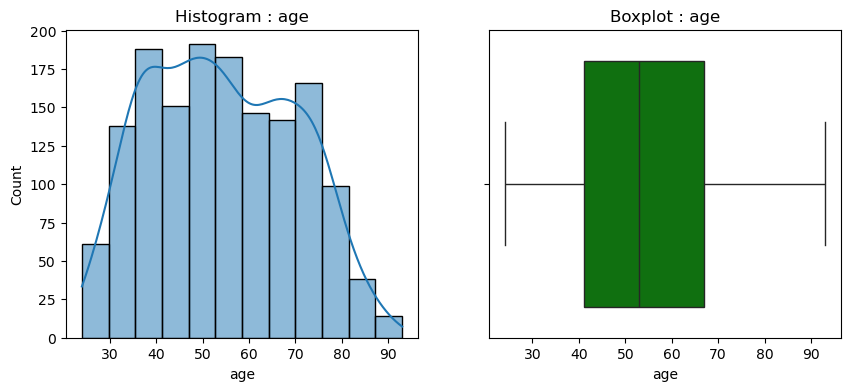

In [21]:
print('Age Description')
print(round(df['age'].describe(), 2))
print('Skewness =', round(df['age'].skew(), 2))

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Histogram : age')
sns.histplot(df['age'], kde=True, bins = 12);

plt.subplot(1,2,2)
plt.title('Boxplot : age')
sns.boxplot(x = 'age', data = df, color='green');

- Age, ranging from 24 to 93, has a slight right skew but can be considered normally distributed for analysis due to minimal skewness and a wavy peak.
- 
Its mean (54.24) slightly exceeds the median (53), indicating this minor skewness. No outliers are present

economic.cond.national %age Count
economic.cond.national
3    39.82
4    35.46
2    16.88
5     5.41
1     2.44
Name: proportion, dtype: float64
Average Score = 3.25


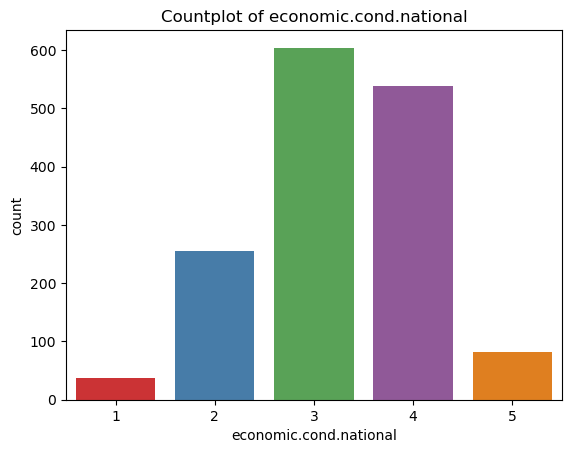



economic.cond.household %age Count
economic.cond.household
3    42.52
4    28.68
2    18.46
5     6.06
1     4.28
Name: proportion, dtype: float64
Average Score = 3.14


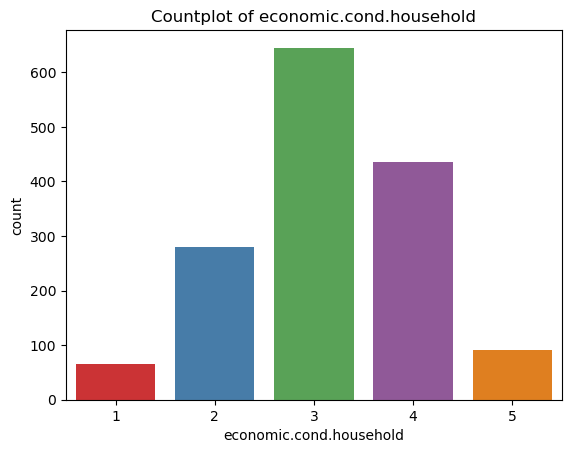



Blair %age Count
Blair
4    54.91
2    28.61
5    10.02
1     6.39
3     0.07
Name: proportion, dtype: float64
Average Score = 3.34


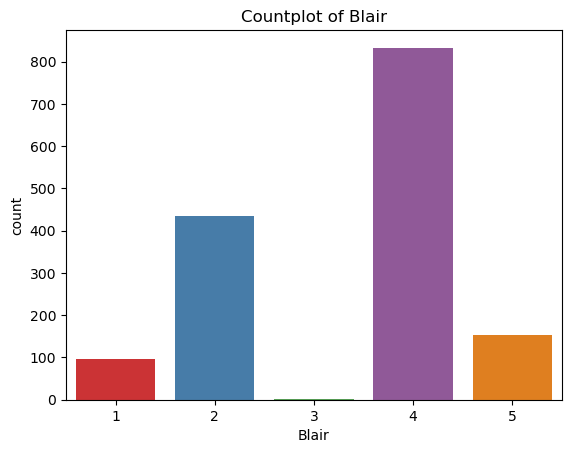



Hague %age Count
Hague
2    40.67
4    36.72
1    15.36
5     4.81
3     2.44
Name: proportion, dtype: float64
Average Score = 2.75


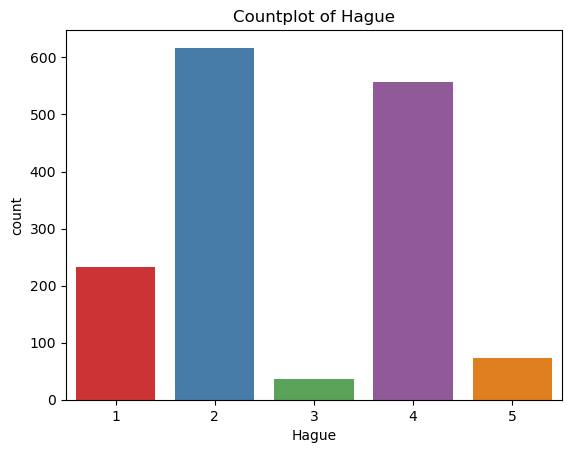



Europe %age Count
Europe
11    22.28
6     13.65
3      8.44
4      8.31
5      8.11
9      7.32
8      7.32
1      7.19
10     6.66
7      5.67
2      5.08
Name: proportion, dtype: float64
Average Score = 6.74


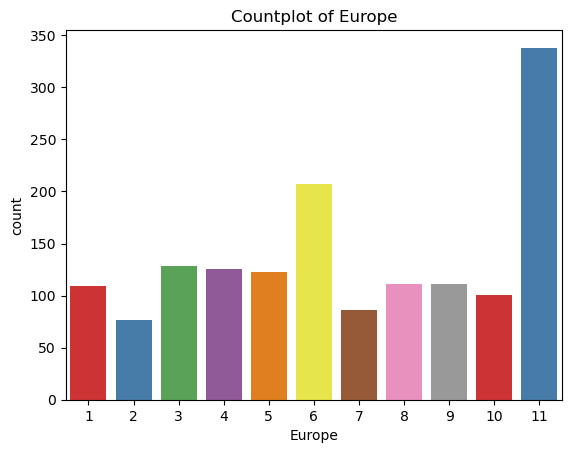



political.knowledge %age Count
political.knowledge
2    51.15
0    29.93
3    16.41
1     2.50
Name: proportion, dtype: float64
Average Score = 1.54


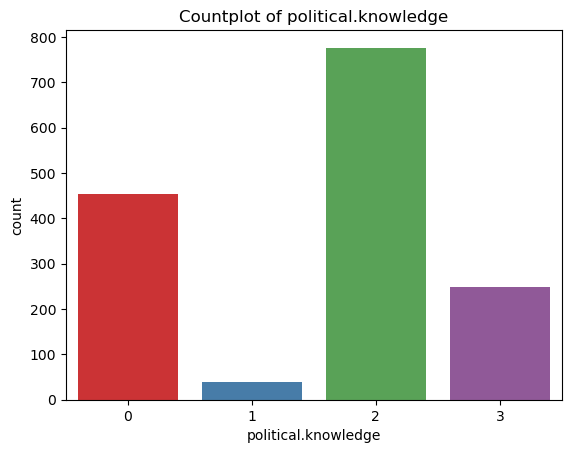

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ord' contains the list of columns you want to plot
for i in ord:
    print(i, '%age Count')
    print(round(df[i].value_counts(normalize=True) * 100, 2))
    print('Average Score =', round(df[i].mean(), 2))

    custom_palette = sns.color_palette("Set1")

    plt.title('Countplot of ' + str(i))
    sns.countplot(x=df[i], palette=custom_palette)
    plt.show()
    print('\n')

- National economic condition received a rating of 3 or 4 from ~75% respondents, average score: 3.25.- Household economic condition rated 3 or 4 by ~70% of individuals, average score: 3.14.
- Blair's favorable rating by ~65% respondents, average score: 3.34, suggests satisfaction with Labour party.
- Hague rated poorly by ~55% respondents, average score: 2.75. Average score of 6.74 indicates majority leaning towards Brexit, with 22% strongly favoring.
- 30% respondents unaware of their party's stance on European Integration, while 50% are well-informed.for

vote %age Count
vote
Labour          69.68
Conservative    30.32
Name: proportion, dtype: float64


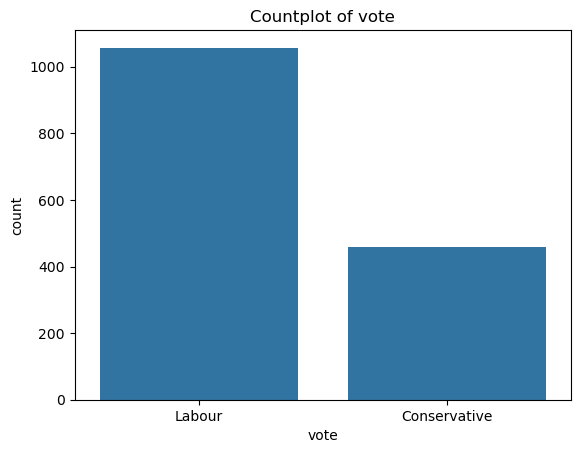

gender %age Count
gender
female    53.26
male      46.74
Name: proportion, dtype: float64


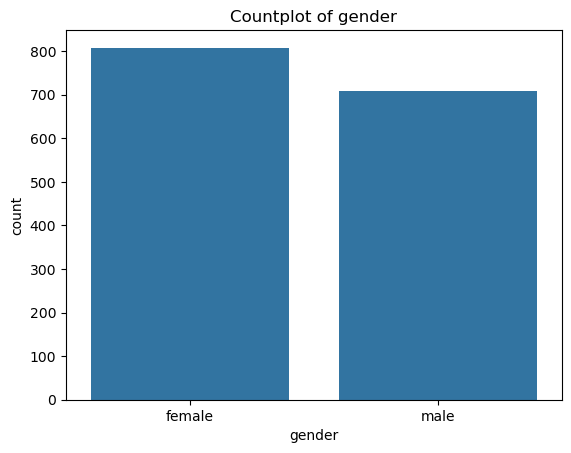

In [23]:
for i in cat:
  print(i, '%age Count')
  print(round(df[i].value_counts(normalize = True)*100,2))

  plt.title('Countplot of ' + str(i))
  sns.countplot(x = df[i]);
  plt.show()

- Survey of 1500 individuals shows ~70% support for Labour Party, ~30% for Conservative Party.
- Slight class imbalance noted in target variable, but no drastic underrepresentation of Conservative class. Over/under sampling techniques not required.d

Text(0.5, 1.0, 'Blair boxplot')

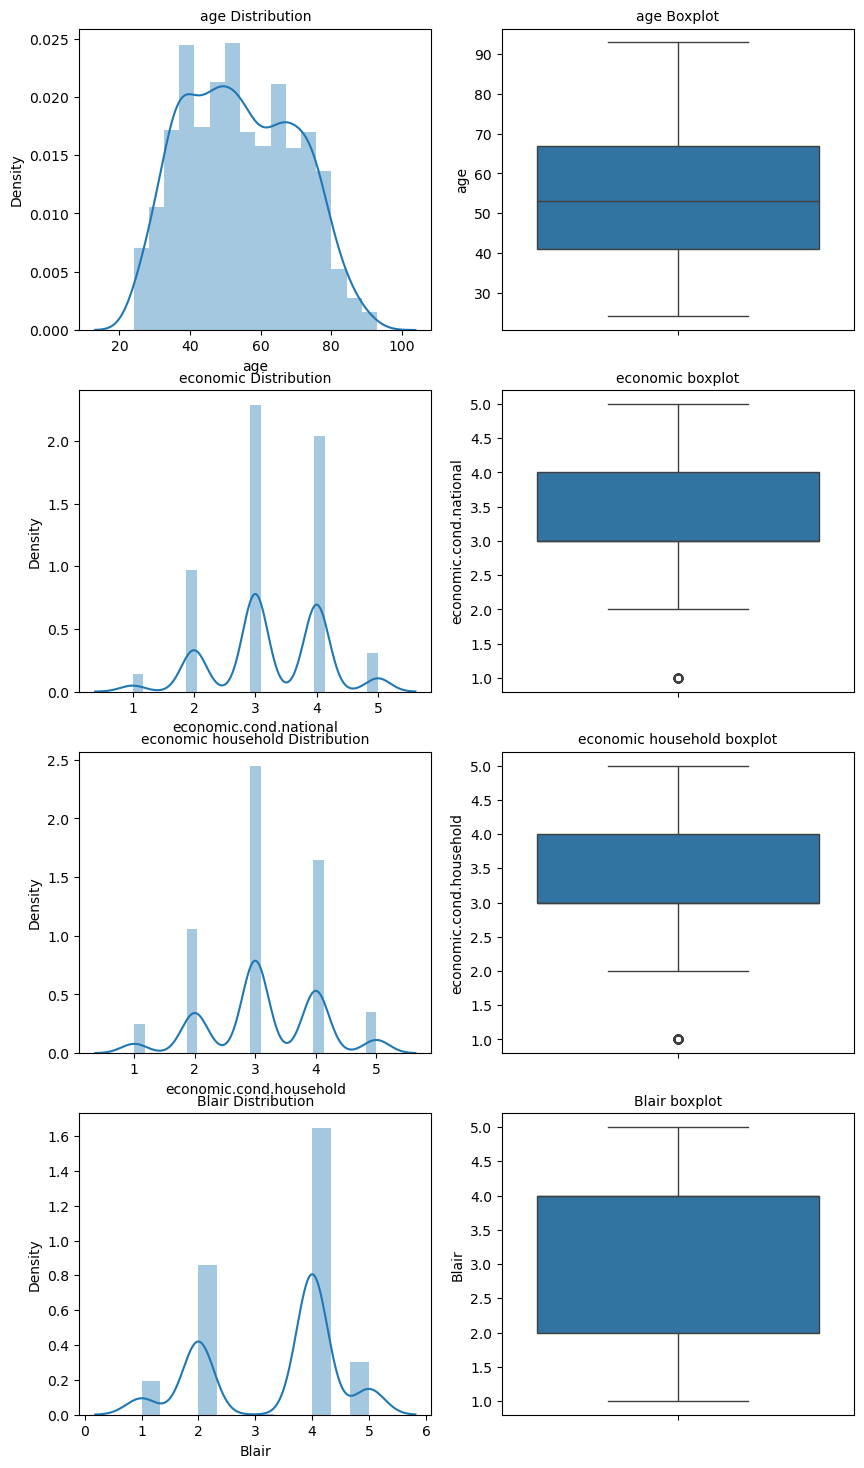

In [24]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a=sns.distplot(df['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=10)

a=sns.boxplot(df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=10)

a=sns.distplot(df['economic.cond.household'], ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=10)

a=sns.boxplot(df['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("economic household boxplot", fontsize=10)

a=sns.distplot(df['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a=sns.boxplot(df['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=10)

Text(0.5, 1.0, 'political knowledge boxplot')

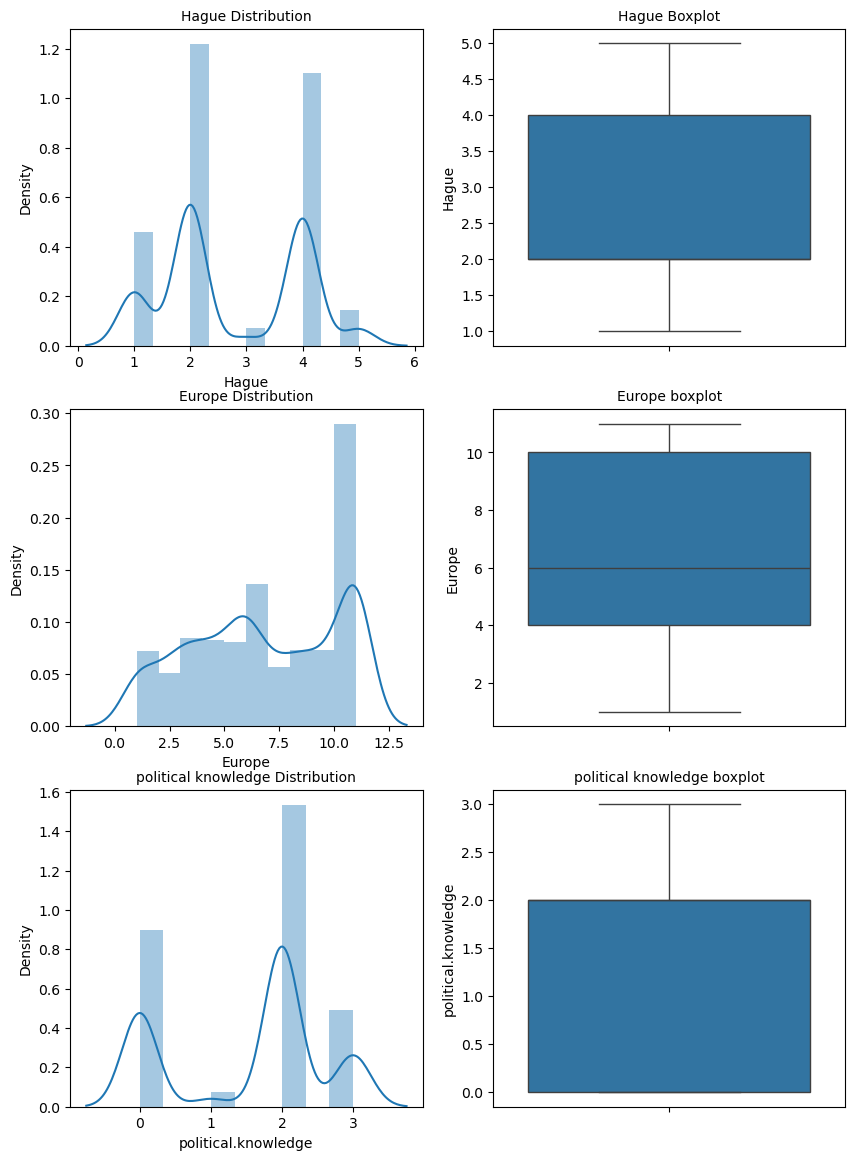

In [25]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,14)
a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=10)

a=sns.distplot(df['political.knowledge'], ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=10)

a=sns.boxplot(df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=10)

#### From the above visualization and analysis the data I can see that for
- age - Data is normally distributed and the mean and median are almost same. The mean for age is 54.18 and the median is 53. The minimum age of the labour leader is 24 and the maximum age of the labour leader is 93. No outlier is detected.
- economic.cond.national- Data is normally distributed and the mean and median are almost same. The mean is 3.25 and the median is 3. Assessment of current national economic conditions lies from 1 to 5. One outlier is detected.
- economic.cond.household- Data is normally distributed and the mean and median are almost same. The mean is 3.14 and the median is 3. Assessment of current household economic conditions lies from 1 to 5. One outlier is detected.
- Blair- Data is normally distributed and the mean and median are almost same. The mean is 3.33 and the median is 4. Assessment of the Labour leader lies from 1 to 5. No outlier is detected.
- Hague- Data is normally distributed and the mean and median are almost same. The mean is 2.74 and the median is 2. Assessment of the Conservative leader lies from 1 to 5. No outlier is detected.
- Europe - Data is normally distributed and the mean and median are almost same. The mean is 6.72 and the median is 6. The rating of respondents' attitudes toward European integration lies from 1 to 11. No outlier is detected.
- political.knowledge- Data is normally distributed and the mean and median are almost same. There is no left skew. The mean is 1.54 and the median is 2. The rating of knowledge of parties' positions on European integration lies from 0 to 3. No outlier is detected.is detected.

### Bivariate Analysis

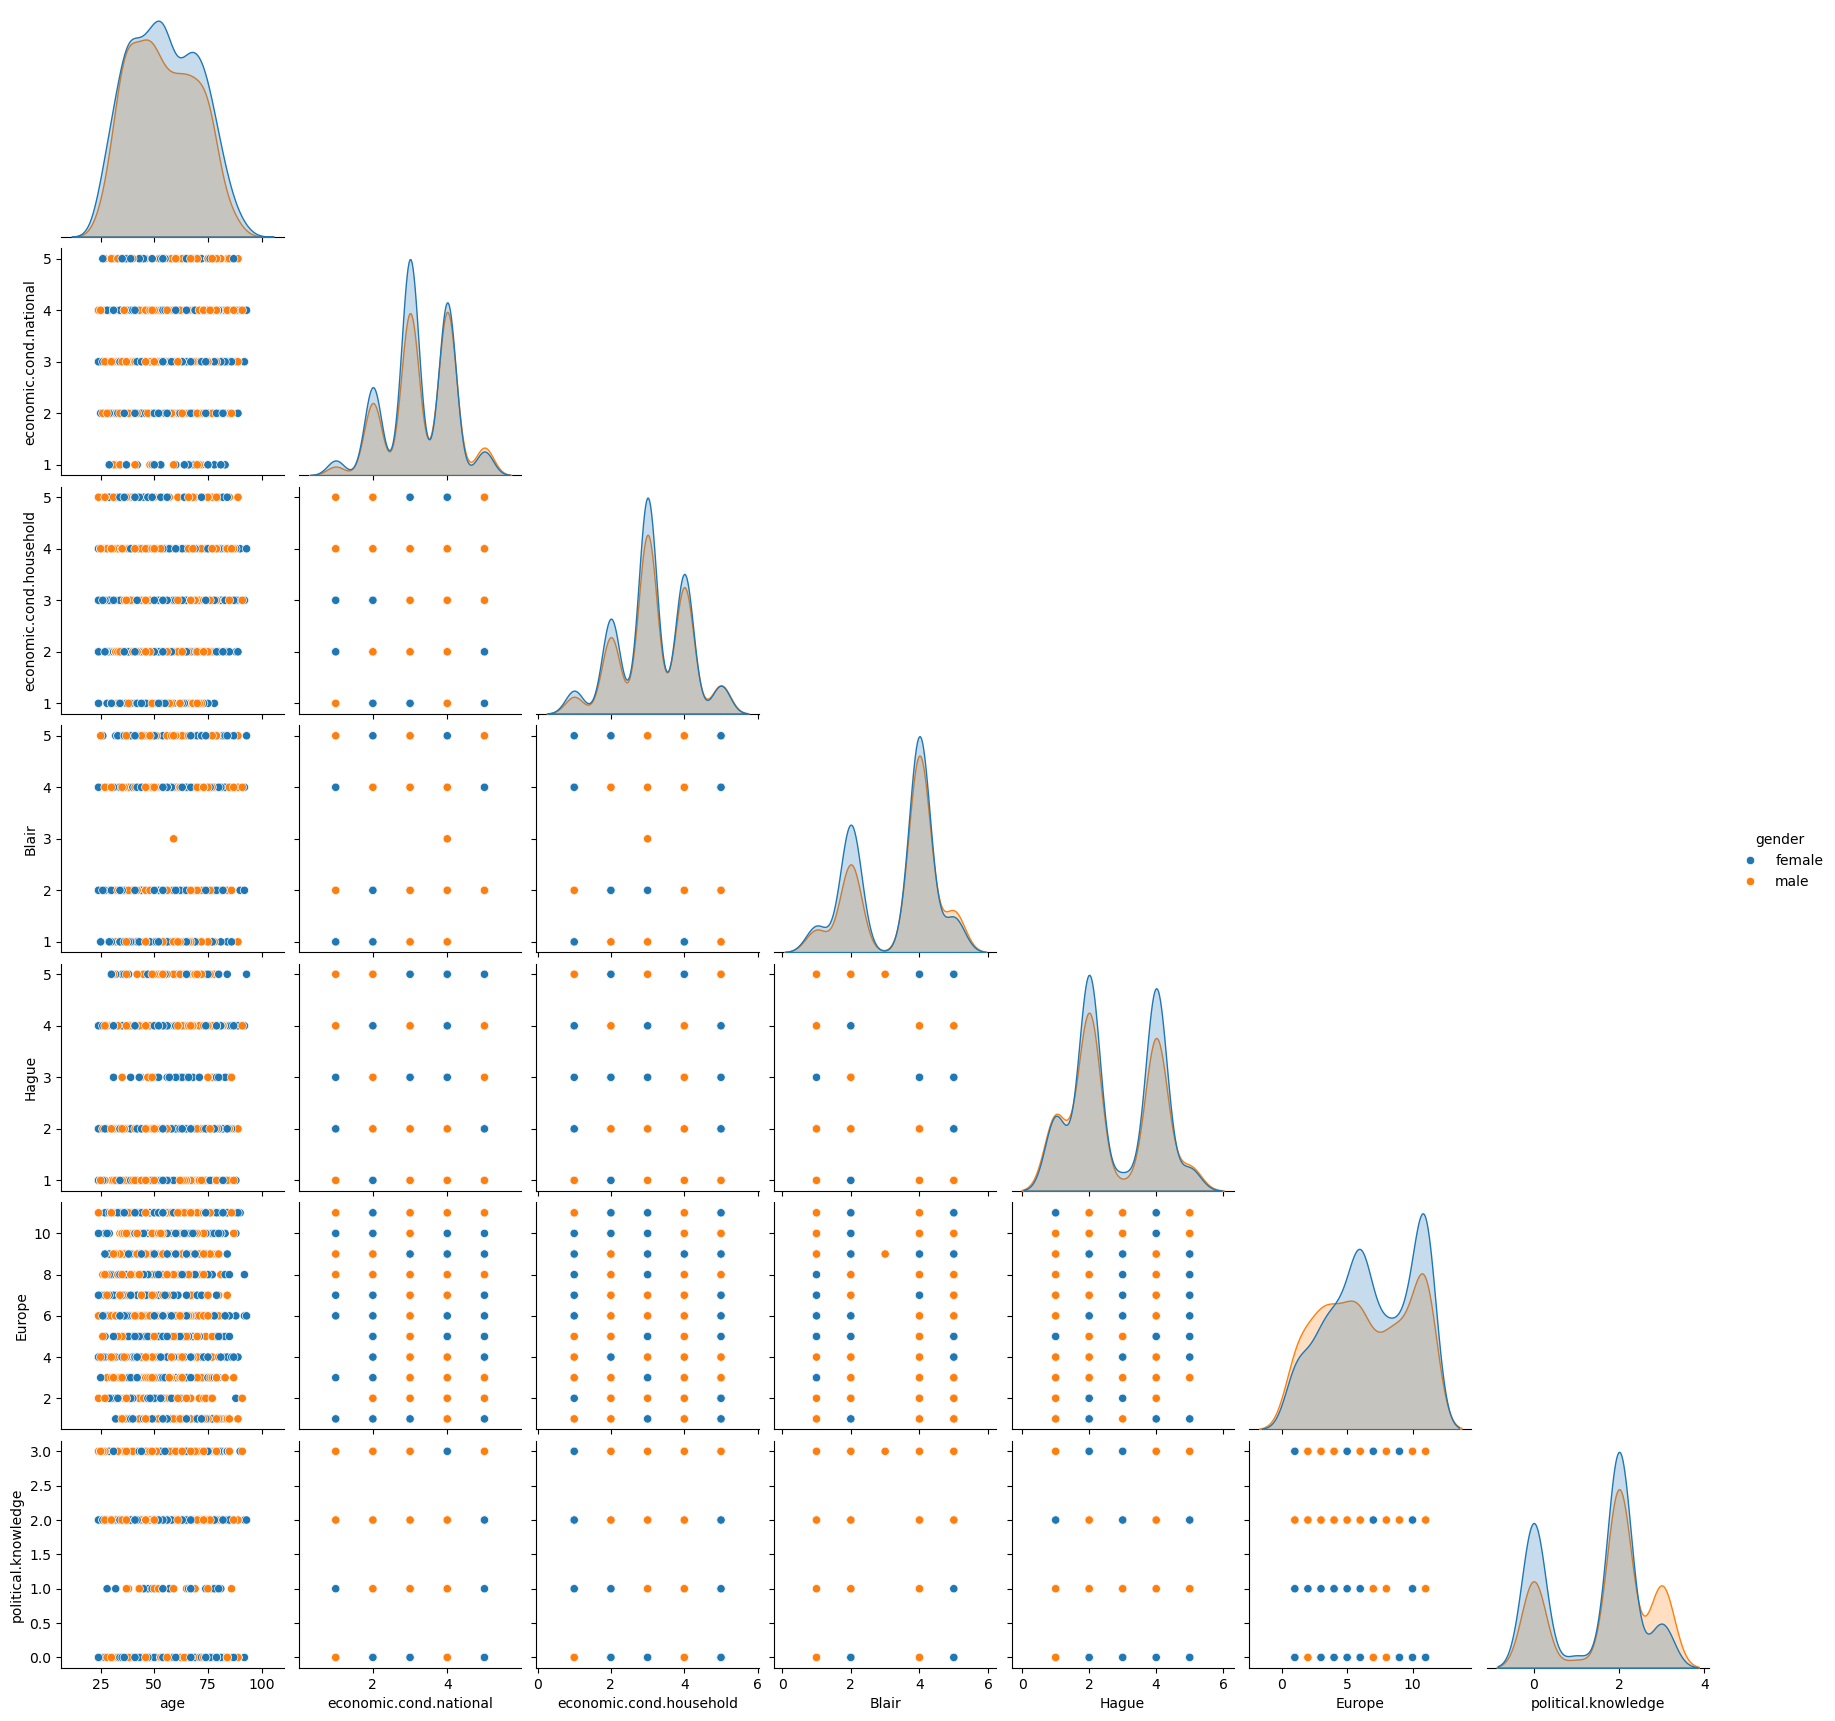

In [26]:
sns.pairplot(data= df, hue='gender', corner = True)  
plt.show()

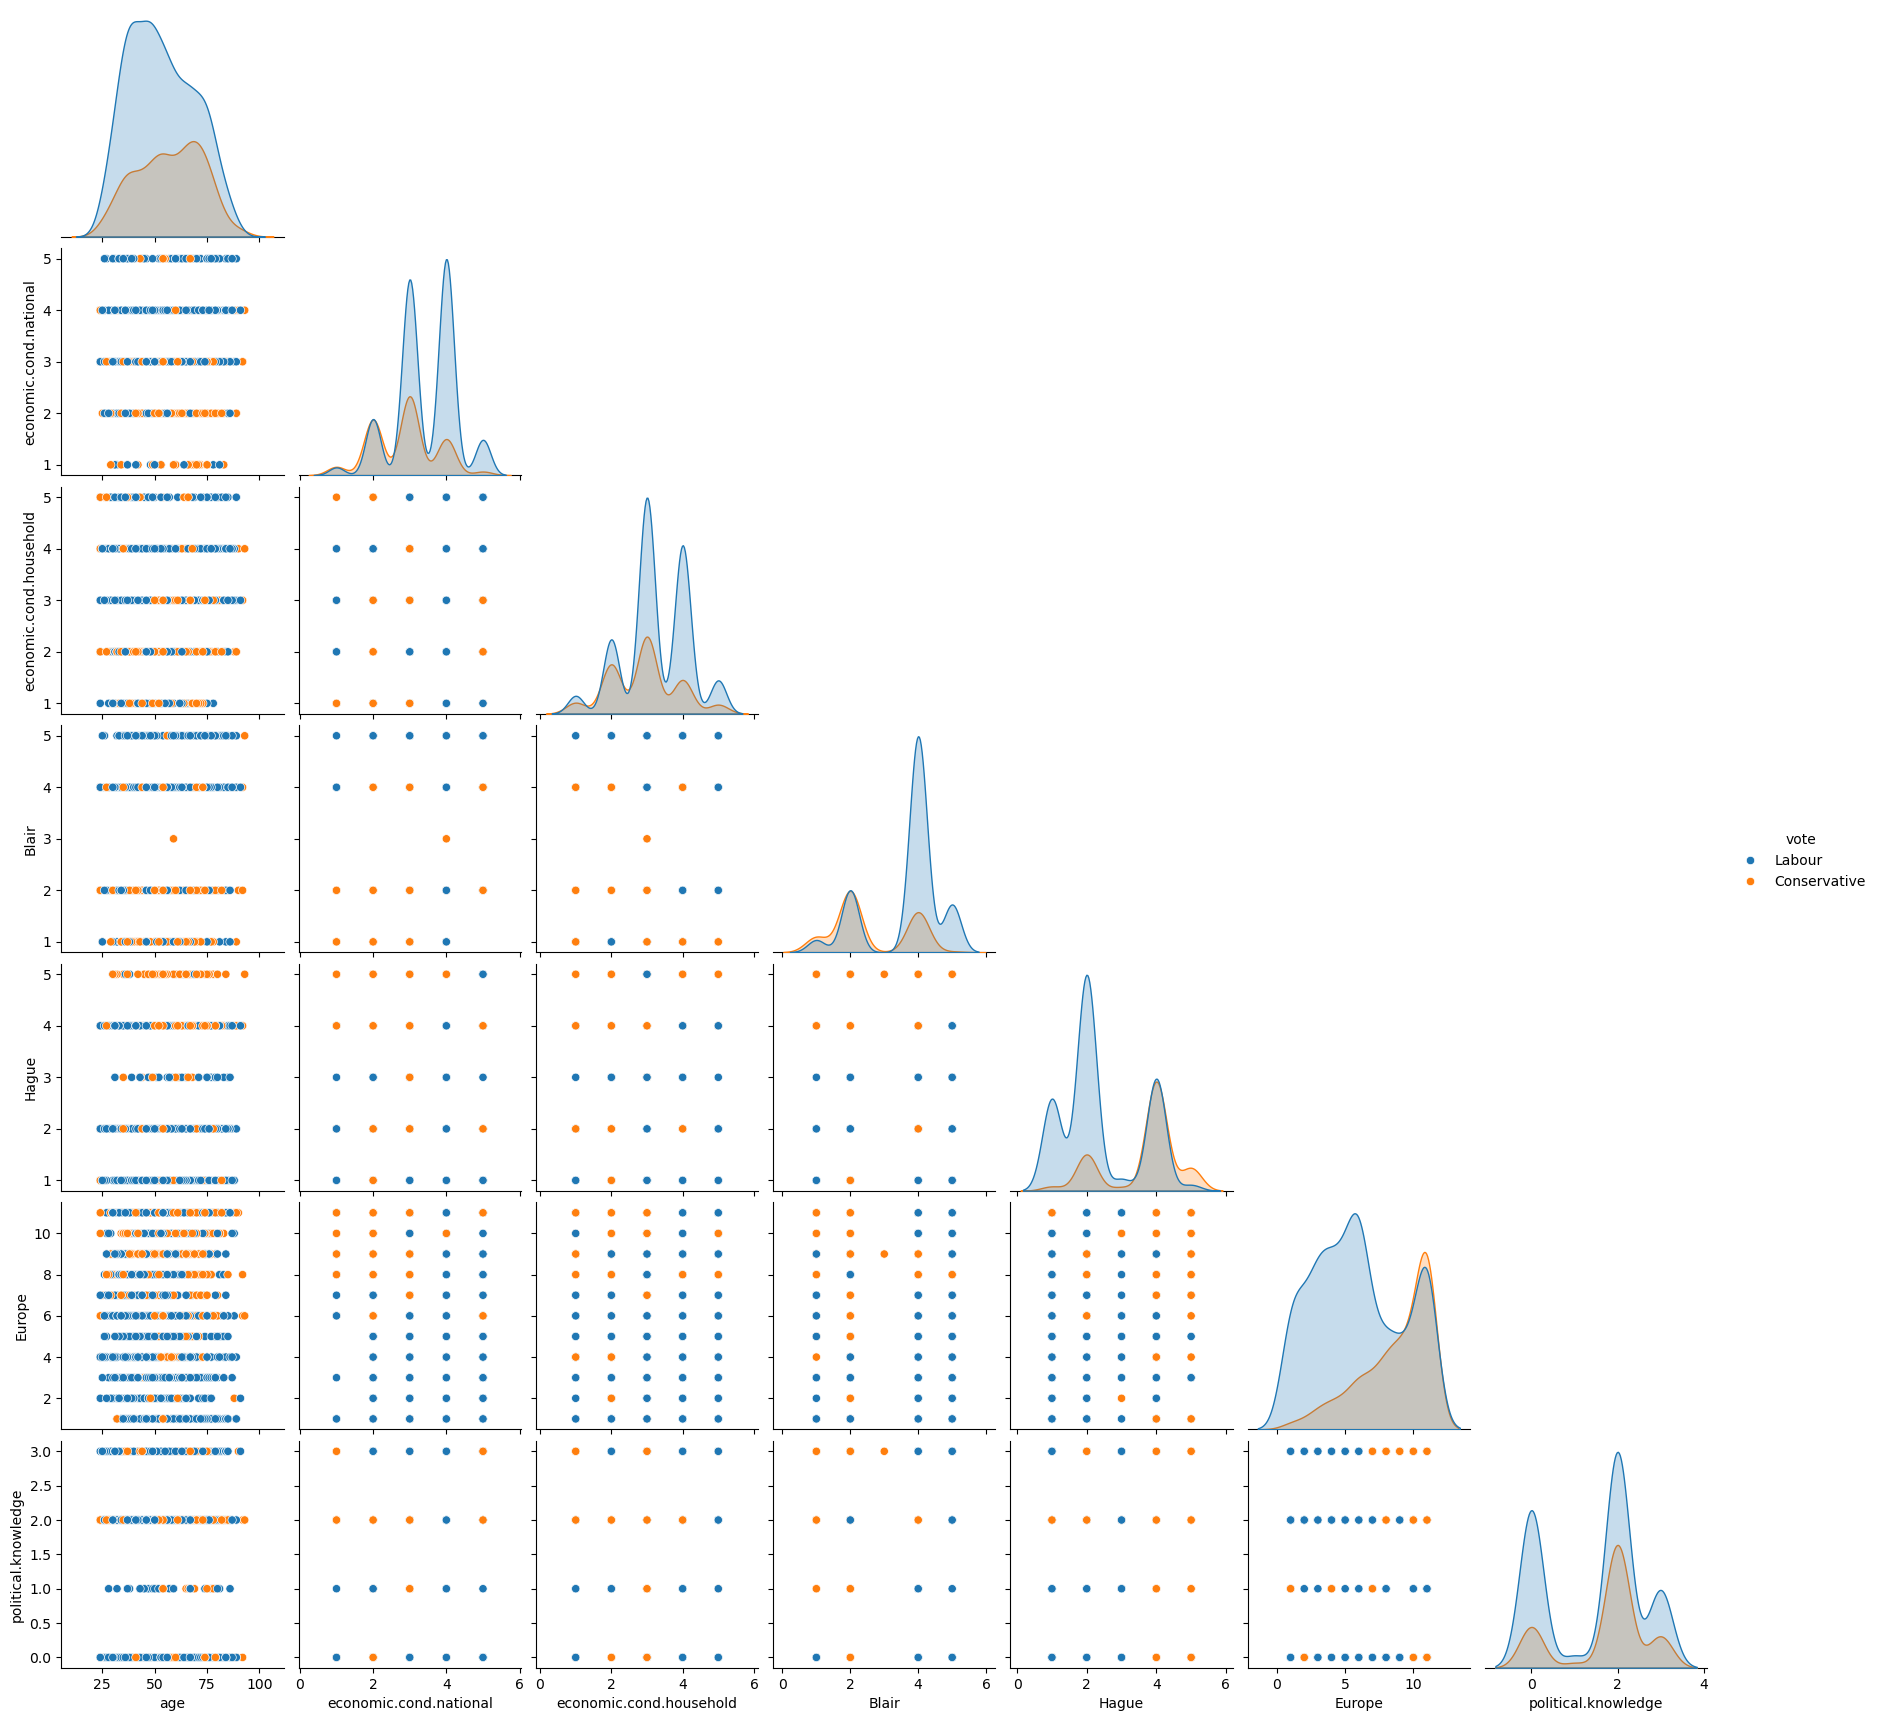

In [27]:
sns.pairplot(df, hue="vote", corner=True);

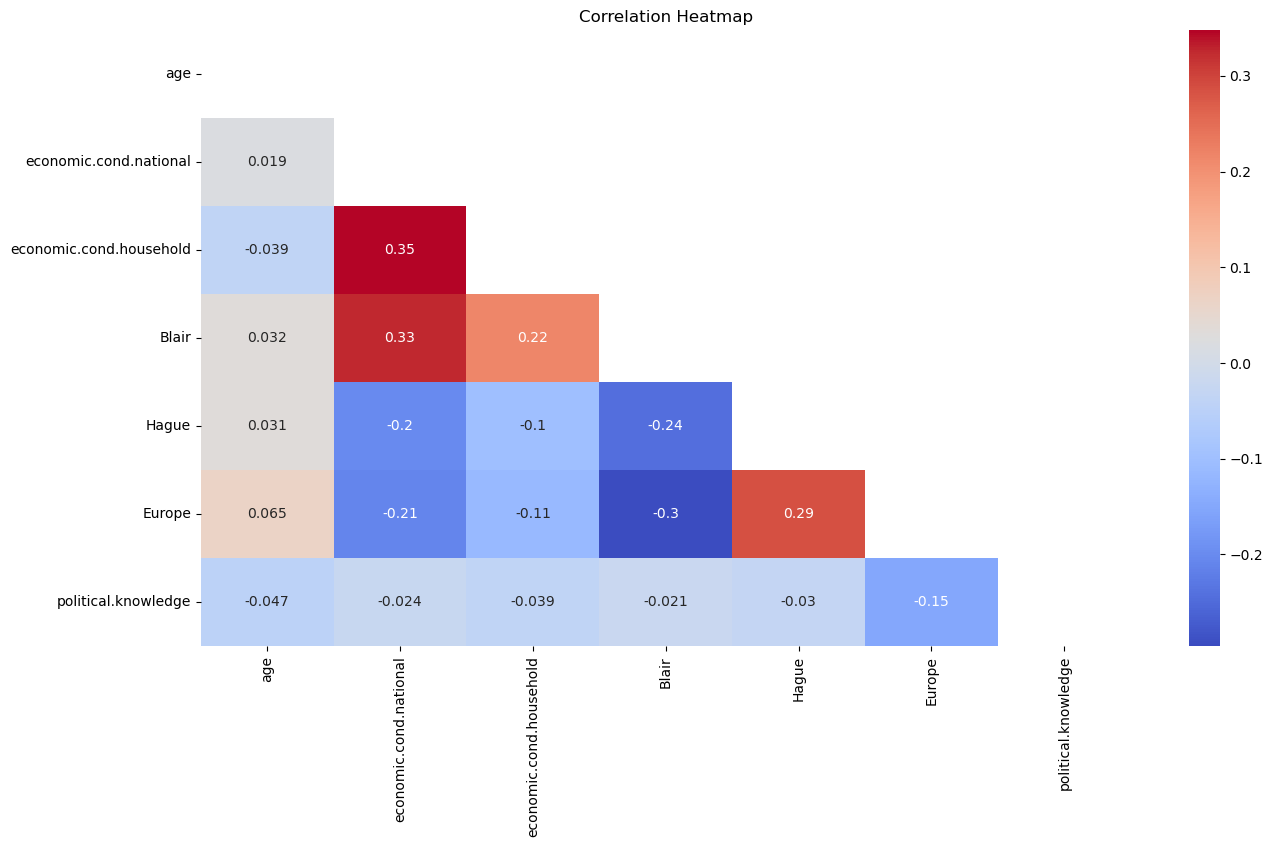

In [28]:
numeric_df = df.select_dtypes(include='number')

# Create the correlation matrix
corr_matrix = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix))

# Plot the heatmap
plt.figure(figsize=(15, 8))
plt.title('Correlation Heatmap')
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm')
plt.show()

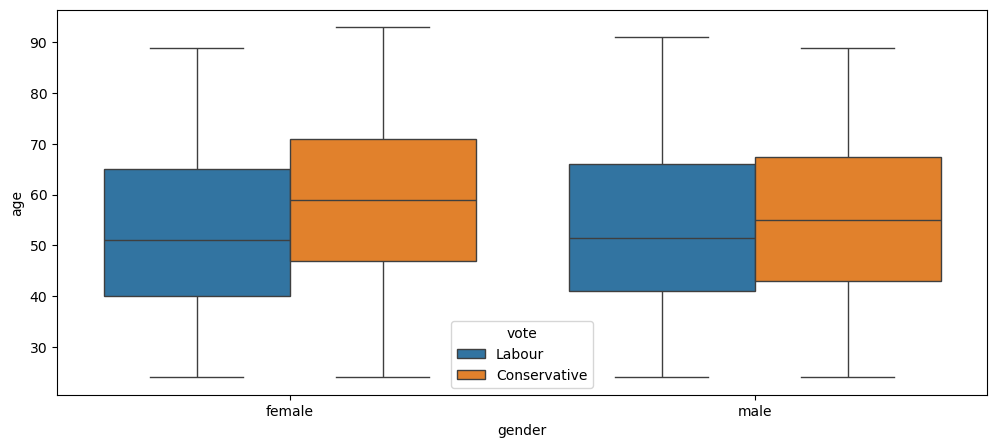

In [29]:
#Age vs Gender and hue=vote:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df['age'],x=df['gender'],hue=df['vote'],ax=ax)
plt.show()

- Avg age group near to 60 choose to elect conservative party whereas avg age group near to 50 choose to elect Labour party.
- Middle 50% of the female people who fall under the age group within the range of 40 to 65 choose to elect Labour party.
- Middle 50% of the female people who fall under the age group within the range of 50 to 70 choose to elect conservative party.
- So we can see from the boxplot that has the age increases people choose to elect conservative party.

In [30]:
# Targeted variable
df.groupby(['vote']).count()

age  economic.cond.national  economic.cond.household  Blair  \
vote                                                                         
Conservative   460                     460                      460    460   
Labour        1057                    1057                     1057   1057   

              Hague  Europe  political.knowledge  gender  
vote                                                      
Conservative    460     460                  460     460  
Labour         1057    1057                 1057    1057

gender        female   male
vote                       
Conservative   31.81  28.63
Labour         68.19  71.37

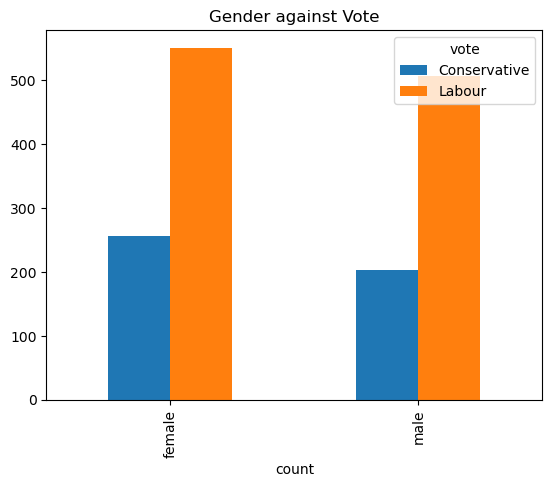

In [31]:
pd.crosstab(df['gender'], df['vote']).plot(kind = 'bar')
plt.title('Gender against Vote')
plt.xlabel('count');
round(pd.crosstab(df['vote'], df['gender'], normalize = 'columns') * 100, 2)

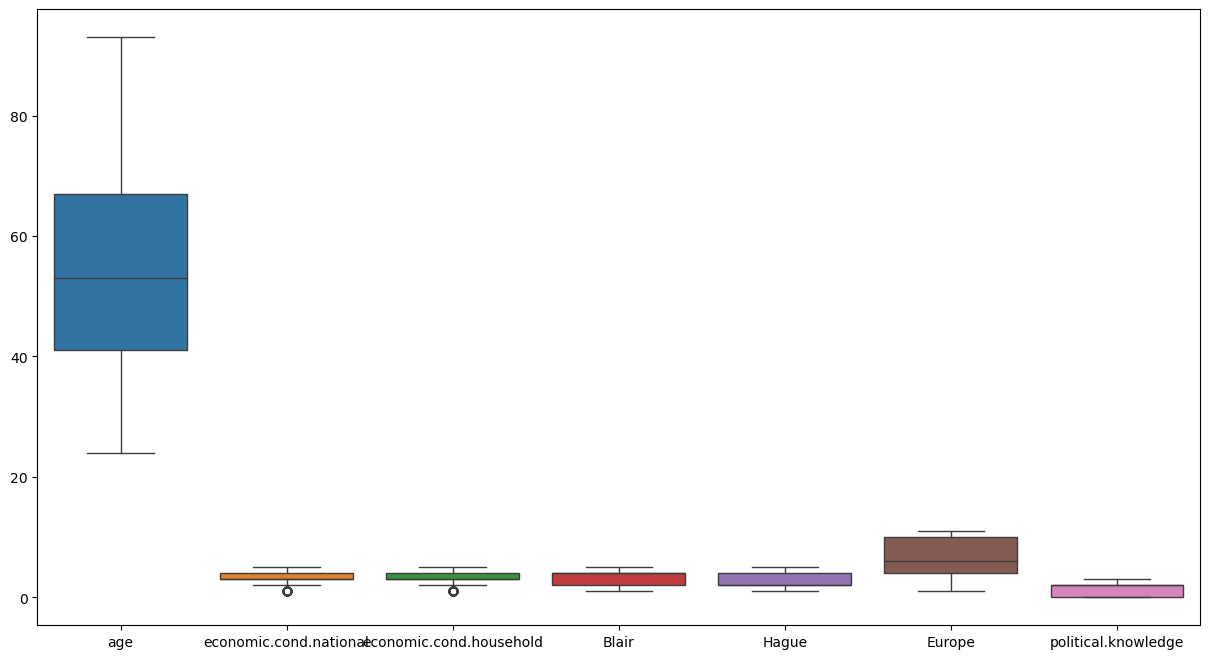

In [32]:
plt.subplots(figsize=(15,8))

sns.boxplot(data=df,orient="v")
plt.show()

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [34]:
dtypes=df.dtypes[(df.dtypes!= 'object')].index
for column in df[dtypes].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

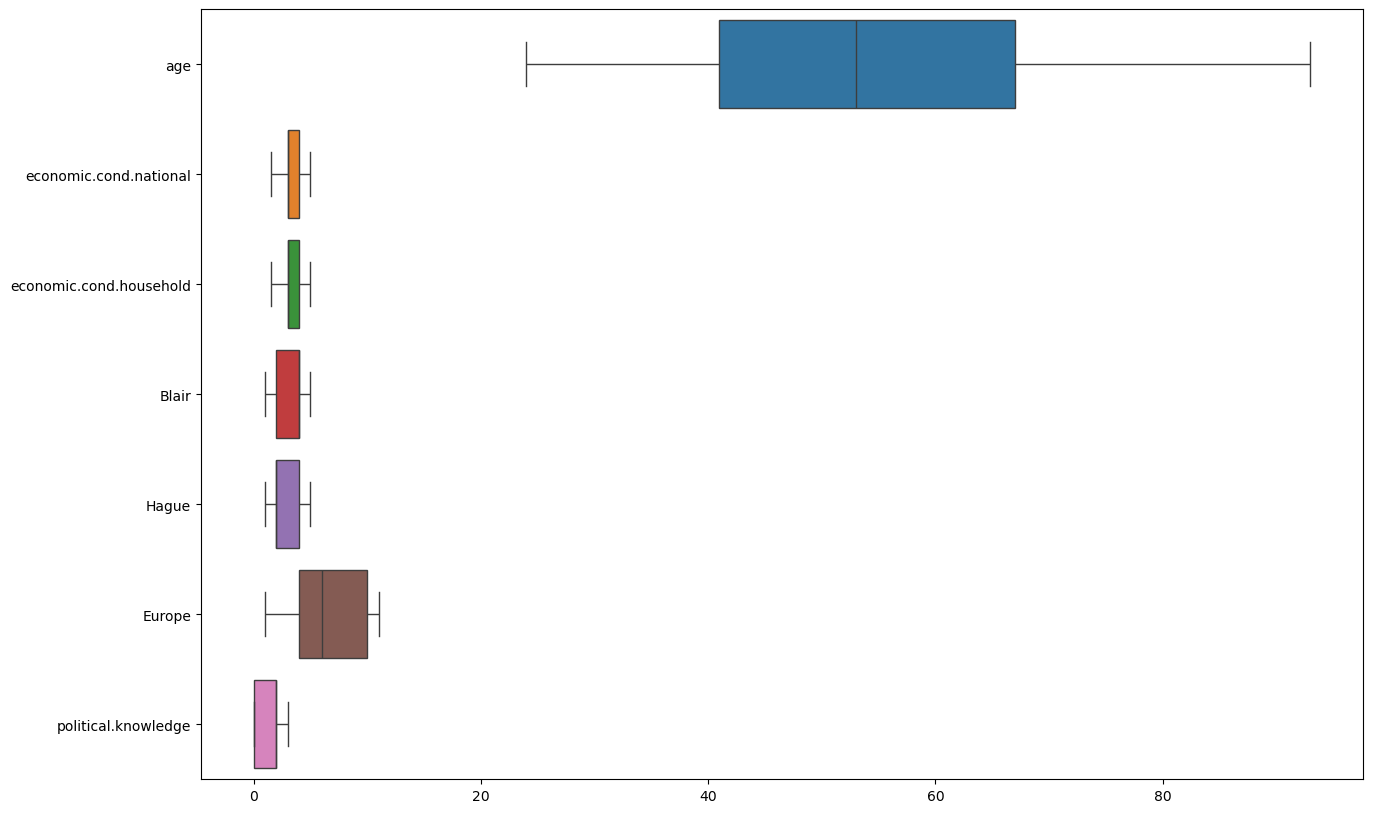

In [35]:
plt.subplots(figsize=(15,10))

sns.boxplot(data=df,orient="h")
plt.show()

economic.cond.national    1.5    2.0    3.0    4.0    5.0
vote                                                     
Conservative            56.76  54.69  32.95  16.91  10.98
Labour                  43.24  45.31  67.05  83.09  89.02

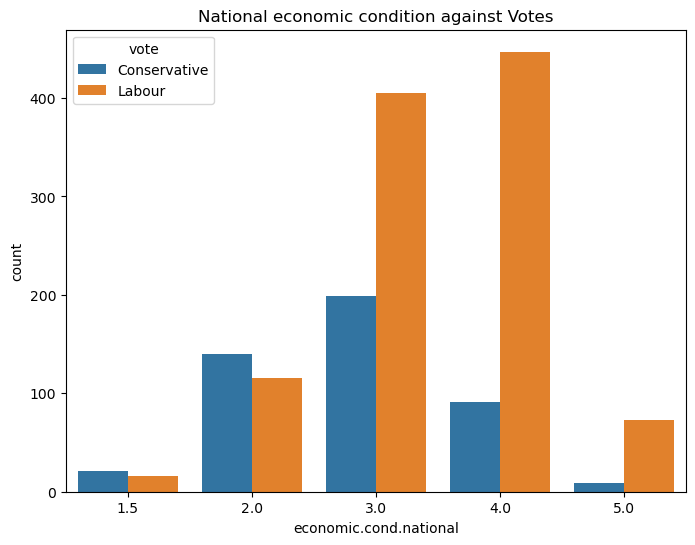

In [36]:
plt.figure(figsize = [8, 6])
plt.title('National economic condition against Votes');
sns.countplot(data = df, x = 'economic.cond.national', hue = 'vote');
round(pd.crosstab(df['vote'], df['economic.cond.national'], normalize = 'columns') * 100, 2)

- The plot confirms Labour's majority vote and highlights that voters rating national economic conditions as average or above lean towards Labour. This echoes the previously observed positive correlation with Labour leader's ratings.

economic.cond.household    1.5   2.0    3.0    4.0   5.0
vote                                                    
Conservative             43.08  45.0  30.54  19.77  25.0
Labour                   56.92  55.0  69.46  80.23  75.0

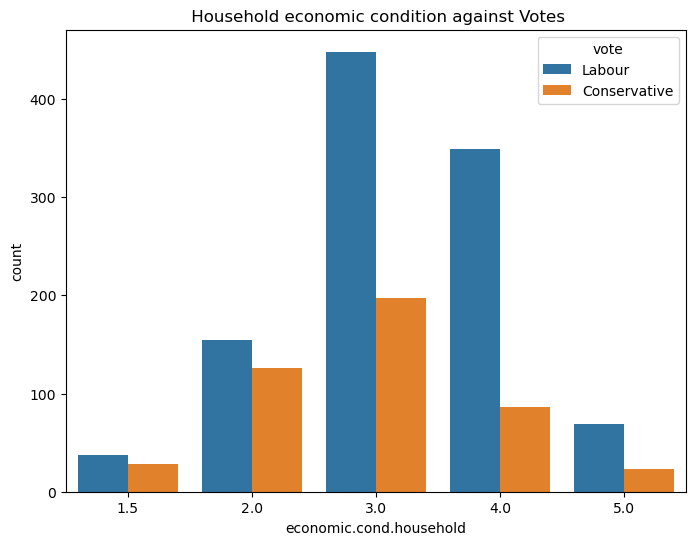

In [37]:
plt.figure(figsize = [8, 6])
plt.title(' Household economic condition against Votes');
sns.countplot(data = df, x = 'economic.cond.household', hue = 'vote');
round(pd.crosstab(df['vote'], df['economic.cond.household'], normalize = 'columns') * 100, 2)

- Majority of voters rating their household economic conditions as average or above prefer Labour. This noticeable vote difference for these ratings between Labour and Conservatives reinforces Labour's appeal.

Blair           1.0   2.0    3.0    4.0    5.0
vote                                          
Conservative  60.82  55.3  100.0  18.85   1.97
Labour        39.18  44.7    0.0  81.15  98.03

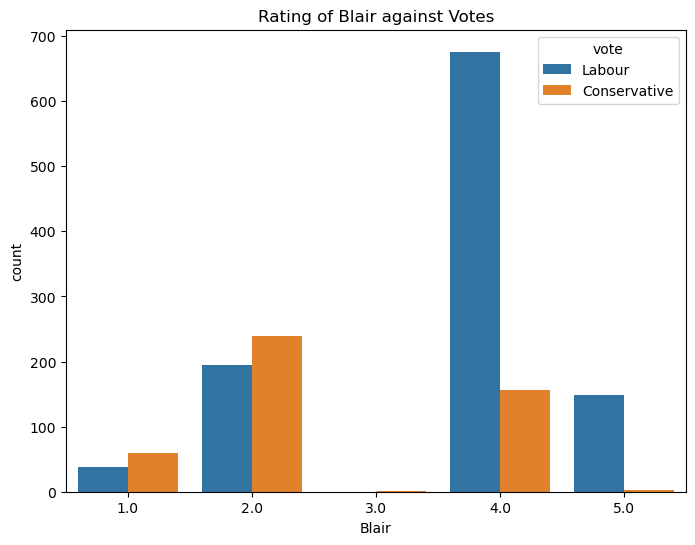

In [38]:
plt.figure(figsize = [8, 6])
plt.title('Rating of Blair against Votes');
sns.countplot(data = df, x = 'Blair', hue = 'vote');
round(pd.crosstab(df['vote'], df['Blair'], normalize = 'columns') * 100, 2)

- Voters giving high ratings to Tony Blair typically support Labour, while those rating him low typically vote Conservative, as expected.

Hague           1.0   2.0    3.0    4.0    5.0
vote                                          
Conservative   4.72  15.4  24.32  51.35  80.82
Labour        95.28  84.6  75.68  48.65  19.18

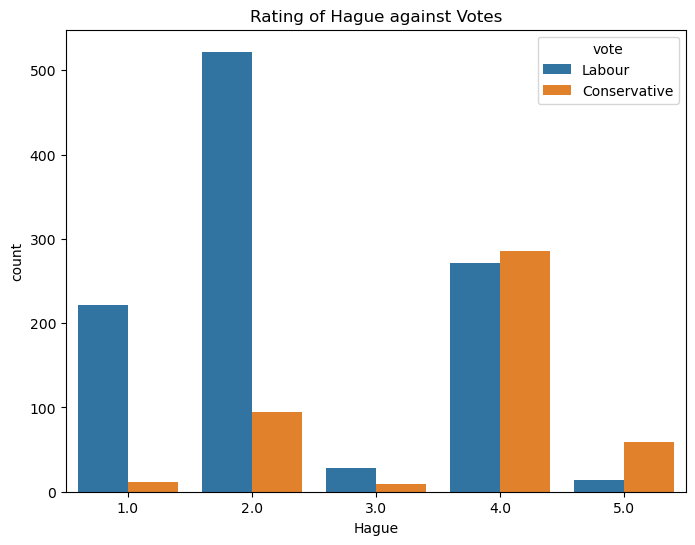

In [39]:
plt.figure(figsize = [8, 6])
plt.title('Rating of Hague against Votes');
sns.countplot(data = df, x = 'Hague', hue = 'vote');
round(pd.crosstab(df['vote'], df['Hague'], normalize = 'columns') * 100, 2)

- Voters who rated William Hague highly tend to vote Conservative, while those giving him low ratings generally support Labour.

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

## Data Preparation:

In [40]:
cat

['vote', 'gender']

In [41]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [42]:
df.head()

vote   age  economic.cond.national  economic.cond.household  Blair  Hague  \
0     1  43.0                     3.0                      3.0    4.0    1.0   
1     1  36.0                     4.0                      4.0    4.0    4.0   
2     1  35.0                     4.0                      4.0    5.0    2.0   
3     1  24.0                     4.0                      2.0    2.0    1.0   
4     1  41.0                     2.0                      2.0    1.0    1.0   

   Europe  political.knowledge  gender  
0     2.0                  2.0       0  
1     5.0                  2.0       1  
2     3.0                  2.0       1  
3     4.0                  0.0       0  
4     6.0                  2.0       1

- We have feature age in years with different unit weight and the remaining is of ratings ranging from 1 to 5; 1 to 11 and 0 to 3. Hence scaling is required for certain models to get accurate results.
- Scaled data can be done only for training set, for test set scaling is not required in the real world data will not be scaled, need to be passed through the model with whatever measurements they come.

In [43]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = df['vote']

In [44]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [45]:
y_train.value_counts(1)

vote
1    0.696513
0    0.303487
Name: proportion, dtype: float64

In [46]:
y_test.value_counts(1)

vote
1    0.697368
0    0.302632
Name: proportion, dtype: float64

### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

## Modelling:

#### Logistic Regression Model

In [47]:
# Create parameter grid to identify best parameters for logistic regression model:
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['sag','lbfgs','newton-cg','saga','liblinear'],
      'max_iter':[1000,5000,10000],
      'tol':[0.01,0.001,0.0001]
     }

In [48]:
# Create instance for logistic regression
model = LogisticRegression(verbose=True,n_jobs=4)

In [49]:
#Perform gridsearch and fit training dataset into it:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')
grid_search.fit(X_train, y_train)

[LibLinear]

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=4, verbose=True),
             n_jobs=-1,
             param_grid={'max_iter': [1000, 5000, 10000],
                         'penalty': ['l2', 'none', 'l1', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'saga',
                                    'liblinear'],
                         'tol': [0.01, 0.001, 0.0001]},
             scoring='f1')

In [50]:
#Best parameter/estimators of logistic regression:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

LR = grid_search.best_estimator_

{'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01} 

LogisticRegression(max_iter=1000, n_jobs=4, penalty='l1', solver='liblinear',
                   tol=0.01, verbose=True)


In [51]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict = LR.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict = LR.predict(X_test)

In [52]:
#Train Data Accuracy
LR_train_acc=LR.score(X_train,y_train) 
round(LR_train_acc,5)

0.82658

In [53]:
#Test Data Accuracy
LR_test_acc=LR.score(X_test,y_test) 
round(LR_test_acc,5)

0.85965

#### Linear Discriminant Analysis - LDA

In [54]:
#Build LDA Model
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [55]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = LDA.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = LDA.predict(X_test)

In [56]:
#Train Data Accuracy
LDA_train_acc=LDA.score(X_train,y_train) 
round(LDA_train_acc,3)

0.823

In [57]:
#Test Data Accuracy
LDA_test_acc=LDA.score(X_test,y_test) 
round(LDA_test_acc,3)

0.86

- On comparing accuracy of both the models LR and LDA models,Test data accuracy of logistic regression is quite good compared to LDA model. Hence Logistic regression perform good for predicting Labour or conservative party.

#### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [58]:
# Build GaussianNB model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [59]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_NB = NB_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_NB = NB_model.predict(X_test)

In [60]:
#Train Data Accuracy
NB_train_acc=NB_model.score(X_train,y_train) 
round(NB_train_acc,3)

0.82

In [61]:
#Test Data Accuracy
NB_test_acc=NB_model.score(X_test,y_test) 
round(NB_test_acc,3)

0.855

#### K-nearest neighbour

In [62]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

- By default, value of n_neighbors=5, in order to get best KNN model need to try for different K values.
- Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error.or

Misclassification error (MCE) = 1 - Test accuracy score.

Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [63]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test_scaled, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.20175438596491224,
 0.1557017543859649,
 0.16228070175438591,
 0.1535087719298246,
 0.13815789473684215,
 0.13815789473684215,
 0.13596491228070173,
 0.13815789473684215,
 0.13815789473684215,
 0.14254385964912286,
 0.14035087719298245,
 0.14473684210526316,
 0.14254385964912286,
 0.14473684210526316,
 0.14692982456140347]

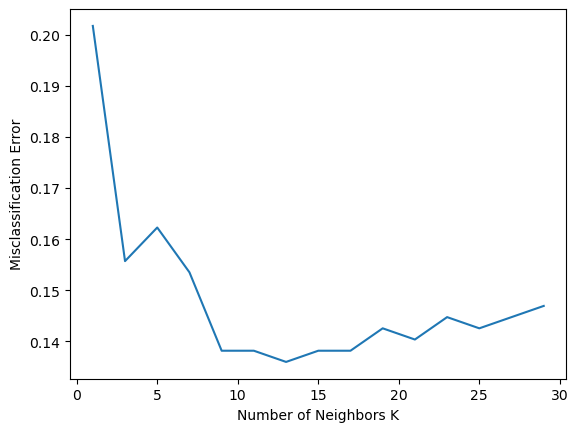

In [64]:
# plot misclassification error vs k
plt.plot(range(1,30,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [65]:
KNN_model=KNeighborsClassifier(n_neighbors=13,metric='euclidean')
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [66]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_KNN = KNN_model.predict(X_train_scaled)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_KNN = KNN_model.predict(X_test_scaled)

In [67]:
#Train Data Accuracy
KNN_train_acc=KNN_model.score(X_train_scaled,y_train) 
round(KNN_train_acc,5)

0.83789

In [68]:
#Test Data Accuracy
KNN_test_acc=KNN_model.score(X_test_scaled,y_test) 
round(KNN_test_acc,5)

0.86404

On comparing accuracy of both the models NB and KNN models,Test data accuracy of KNN model for n_neighbour=13 is quite good compared to NB model. Hence KNN model perform good for predicting Labour or conservative party.

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting.

##### Random Forest Classifier

In [69]:
# Create parameter grid to identify best parameters for RandomForest model:
param_grid = {
    'max_depth': [7],
    'max_features': [4],
    'min_samples_leaf': [40],
    'min_samples_split': [100],
    'n_estimators': [501]
}

In [70]:
# Create instance for RandomForest
model_1 = RandomForestClassifier(random_state=27)
#Perform gridsearch and fit training dataset into it:
grid_search_rf = GridSearchCV(estimator = model_1, param_grid = param_grid, cv = 10)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=27),
             param_grid={'max_depth': [7], 'max_features': [4],
                         'min_samples_leaf': [40], 'min_samples_split': [100],
                         'n_estimators': [501]})

In [71]:
#Best parameter/estimators of RandomForest:
print(grid_search_rf.best_params_,'\n')
print(grid_search_rf.best_estimator_)

rfcl = grid_search_rf.best_estimator_

{'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 40, 'min_samples_split': 100, 'n_estimators': 501} 

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=40,
                       min_samples_split=100, n_estimators=501,
                       random_state=27)


In [72]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_rf = rfcl.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_rf = rfcl.predict(X_test)

In [73]:
#Train Data Accuracy
RF_train_acc=rfcl.score(X_train,y_train) 
round(RF_train_acc,5)

0.81527

In [74]:
#Test Data Accuracy
RF_test_acc=rfcl.score(X_test,y_test) 
round(RF_test_acc,5)

0.83553

#### Bagging

In [75]:
base_estimator=rfcl
# Build BaggingClassifier using RandomForest has a base estimator
Bagging_model=BaggingClassifier(base_estimator,n_estimators=100,random_state=27)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=7, max_features=4,
                                                   min_samples_leaf=40,
                                                   min_samples_split=100,
                                                   n_estimators=501,
                                                   random_state=27),
                  n_estimators=100, random_state=27)

In [76]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_bagging = Bagging_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_bagging = Bagging_model.predict(X_test)

In [77]:
#Train Data Accuracy
BG_train_acc=Bagging_model.score(X_train,y_train) 
round(BG_train_acc,5)

0.80773

In [78]:
#Test Data Accuracy
BG_test_acc=Bagging_model.score(X_test,y_test) 
round(BG_test_acc,5)

0.83991

On comparing accuracy of Random Forest and Bagging models,Test data accuracy of Random Forest model quite good compared to Bagging model. Hence Random Forest model performs well for predicting Labour or conservative party.

##### Gradient Boosting

In [79]:
# Create instance for GradientBoost classifier model
gbcl = GradientBoostingClassifier(n_estimators=100,random_state=27)
gbcl = gbcl.fit(X_train, y_train)

In [80]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_GB = gbcl.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_GB = gbcl.predict(X_test)

In [81]:
#Train Data Accuracy
GB_train_acc=gbcl.score(X_train,y_train) 
round(GB_train_acc,3)

0.886

In [82]:
#Test Data Accuracy
GB_test_acc=gbcl.score(X_test,y_test) 
round(GB_test_acc,3)

0.842

#### Ensemble Learning - AdaBoosting

In [83]:
# Create instance for GradientBoost classifier model
abcl = AdaBoostClassifier(n_estimators=100, random_state=1)
abcl = abcl.fit(X_train, y_train)

In [84]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_AB = abcl.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_AB = abcl.predict(X_test)

In [85]:
#Train Data Accuracy
AB_train_acc=abcl.score(X_train,y_train) 
round(AB_train_acc,3)

0.849

In [86]:
#Test Data Accuracy
AB_test_acc=abcl.score(X_test,y_test) 
round(AB_test_acc,3)

0.836

- On comparing accuracy of Gradient Boosting and AdaBoost models, Test data accuracy of both the models are nearly to the equal, since the difference between the train and test set is very low for Ada boost compared to Gradient Boost model, Ada Boost model performs well for predicting Labour or conservative party.On comparing accuracy of Gradient Boosting and AdaBoost models, Test data accuracy of both the models are almost equal, since the difference between the train and test set is very low for Ada boost compared to Gradient Boost model, Ada Boost model performs well for predicting Labour or conservative party.

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

#### Model Evaluation-Logistic Regression

Training set - LR

Accuracy for Logistic Regression model on Training set is 
 0.827


Classification report for Logistic Regression model on Training set is 
               precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



Confusion Matrix for Logistic Regression model on Training set is


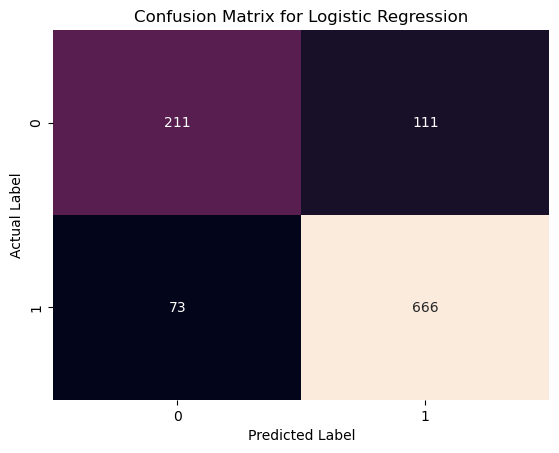

LR_train_precision  0.86
LR_train_recall  0.9
LR_train_f1  0.88


In [87]:
models_names={LR:'Logistic Regression'}

print('Accuracy for {} model on Training set is'.format(models_names[LR]),'\n',round(accuracy_score(y_train,ytrain_predict),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[LR]),'\n',classification_report(y_train,ytrain_predict))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[LR]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LR]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LR_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_train_f1=round(df.loc["1"][2],2)
LR_train_recall=round(df.loc["1"][1],2)
LR_train_precision=round(df.loc["1"][0],2)
print ('LR_train_precision ',LR_train_precision)
print ('LR_train_recall ',LR_train_recall)
print ('LR_train_f1 ',LR_train_f1)

AUC and ROC for the train data -LR

AUC: 0.877


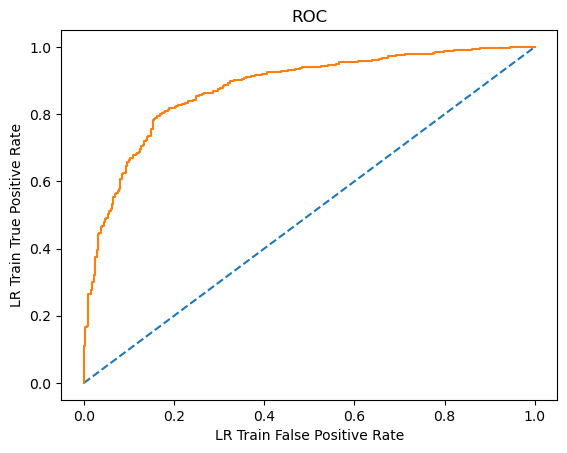

In [88]:
# predict probabilities
ytrain_predict_prob=LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob = ytrain_predict_prob[:, 1]
# calculate AUC
LR_train_auc = roc_auc_score(y_train, ytrain_predict_prob)
print('AUC: %.3f' % LR_train_auc)
# calculate roc curve
LR_train_fpr, LR_train_tpr, LR_train_thresholds = roc_curve(y_train, ytrain_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_train_fpr, LR_train_tpr)
plt.xlabel('LR Train False Positive Rate')
plt.ylabel('LR Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - LR

Accuracy for Logistic Regression model on Testing set is 
 0.86


Classification report for Logistic Regression model on Testing set is 
               precision    recall  f1-score   support

           0       0.82      0.69      0.75       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.85      0.81      0.83       456
weighted avg       0.86      0.86      0.86       456



Confusion Matrix for Logistic Regression model on Testing set is


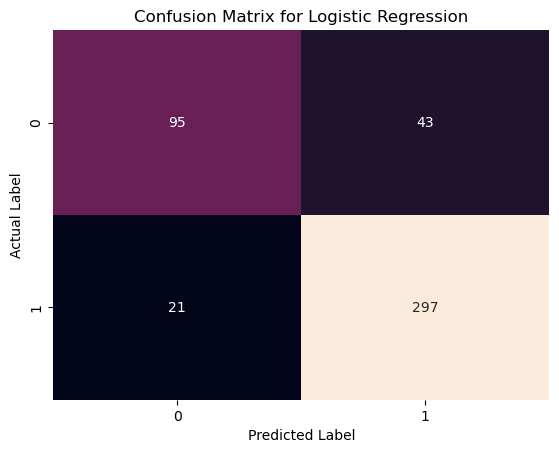

LR_test_precision  0.87
LR_test_recall  0.93
LR_test_f1  0.9


In [89]:
models_names={LR:'Logistic Regression'}

print('Accuracy for {} model on Testing set is'.format(models_names[LR]),'\n',round(accuracy_score(y_test,ytest_predict),3))
print('\n')
print('Classification report for {} model on Testing set is'.format(models_names[LR]),'\n',classification_report(y_test,ytest_predict))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[LR]))
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LR]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LR_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(LR_metrics_test).transpose()
LR_test_f1=round(df.loc["1"][2],2)
LR_test_recall=round(df.loc["1"][1],2)
LR_test_precision=round(df.loc["1"][0],2)
print ('LR_test_precision ',LR_test_precision)
print ('LR_test_recall ',LR_test_recall)
print ('LR_test_f1 ',LR_test_f1)

AUC and ROC for the test data -LR

AUC: 0.915


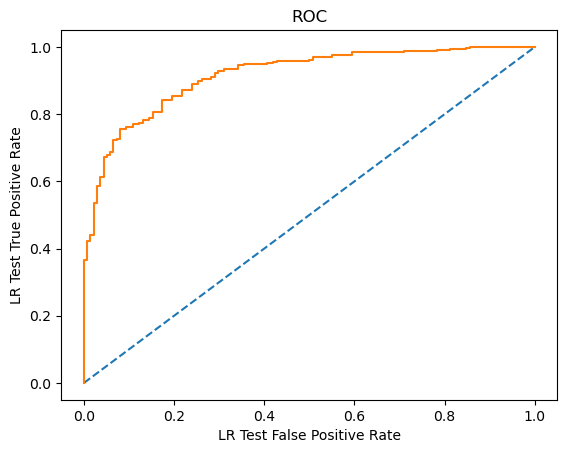

In [90]:
# predict probabilities
ytest_predict_prob=LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob = ytest_predict_prob[:, 1]
# calculate AUC
LR_test_auc = roc_auc_score(y_test, ytest_predict_prob)
print('AUC: %.3f' % LR_test_auc)
# calculate roc curve
LR_test_fpr, LR_test_tpr, LR_test_thresholds = roc_curve(y_test, ytest_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_test_fpr, LR_test_tpr)
plt.xlabel('LR Test False Positive Rate')
plt.ylabel('LR Test True Positive Rate')
plt.title('ROC')
plt.show()

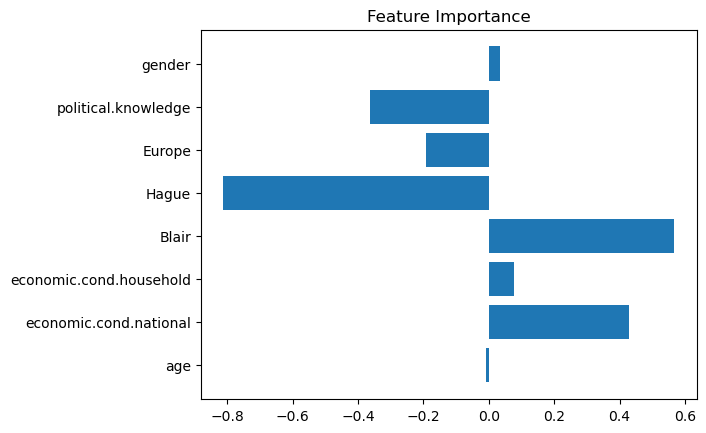

In [91]:
plt.title('Feature Importance')
plt.barh(X_train.columns, LR.coef_[0]);

In [92]:
data = {
    'Model': ['Train set', 'Test set'],
    'Accuracy in %': [82.3, 85.1],
    'AUC in %': [87.5, 91.4],
    'Precision in %': [85, 87],
    'Recall in %': [90, 92],
    'f1-Score': [88, 90]
}

DF1 = pd.DataFrame(data)
DF1.set_index('Model', inplace=True)  # Set 'Model' as the index
DF1.index.name = 'Logistic Regression Conclusion:'  # Add the title
DF1

Accuracy in %  AUC in %  Precision in %  \
Logistic Regression Conclusion:                                            
Train set                                 82.3      87.5              85   
Test set                                  85.1      91.4              87   

                                 Recall in %  f1-Score  
Logistic Regression Conclusion:                         
Train set                                 90        88  
Test set                                  92        90

- Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

#### Model Evaluation-LDA

Training set - LDA

Accuracy for Linear Discriminant Analysis model on Training set is 
 0.823


Classification report for Linear Discriminant Analysis model on Training set is 
               precision    recall  f1-score   support

           0       0.72      0.68      0.70       322
           1       0.86      0.88      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



Confusion Matrix for Linear Discriminant Analysis model on Training set is


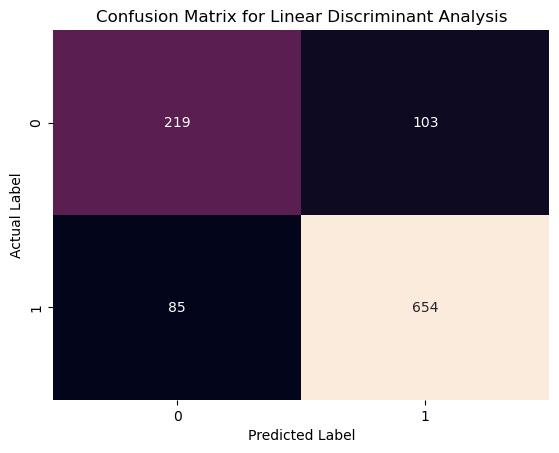

LDA_train_precision  0.86
LDA_train_recall  0.88
LDA_train_f1  0.87


In [93]:
# Predictions on train data with cut-off value 0.5
models_names={LDA:'Linear Discriminant Analysis'}

print('Accuracy for {} model on Training set is'.format(models_names[LDA]),'\n',round(accuracy_score(y_train,pred_class_train),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[LDA]),'\n',classification_report(y_train,pred_class_train))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[LDA]))
sns.heatmap(confusion_matrix(y_train,pred_class_train),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LDA]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LDA_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_f1=round(df.loc["1"][2],2)
LDA_train_recall=round(df.loc["1"][1],2)
LDA_train_precision=round(df.loc["1"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

AUC and ROC for the train data -LDA

AUC: 0.877


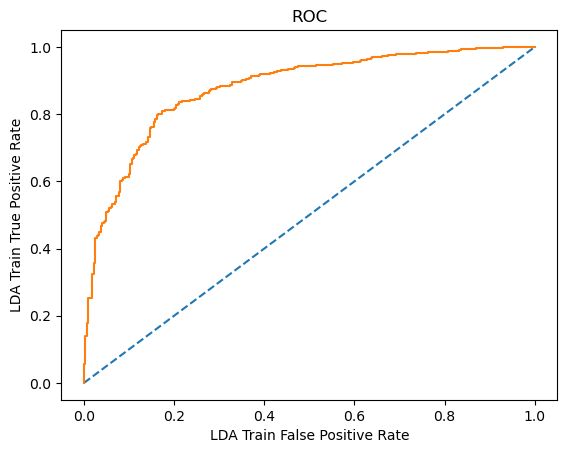

In [94]:
# predict probabilities
pred_prob_train = LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
pred_prob_train = pred_prob_train[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train, pred_prob_train)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train, pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)
plt.xlabel('LDA Train False Positive Rate')
plt.ylabel('LDA Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - LDA

Accuracy for Linear Discriminant Analysis model on Testing set is 
 0.86


Classification report for Linear Discriminant Analysis model on Testing set is 
               precision    recall  f1-score   support

           0       0.81      0.70      0.75       138
           1       0.88      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



Confusion Matrix for Linear Discriminant Analysis model on Testing set is


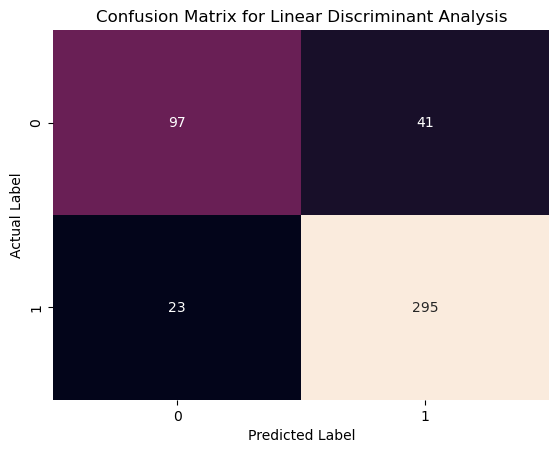

LDA_test_precision  0.88
LDA_test_recall  0.93
LDA_test_f1  0.9


In [95]:
# Predictions on train data with cut-off value 0.5
models_names={LDA:'Linear Discriminant Analysis'}

print('Accuracy for {} model on Testing set is'.format(models_names[LDA]),'\n',round(accuracy_score(y_test,pred_class_test),3))
print('\n')
print('Classification report for {} model on Testing set is'.format(models_names[LDA]),'\n',classification_report(y_test,pred_class_test))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[LDA]))
sns.heatmap(confusion_matrix(y_test,pred_class_test),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LDA]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LDA_metrics_test=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(LDA_metrics_test).transpose()
LDA_test_f1=round(df.loc["1"][2],2)
LDA_test_recall=round(df.loc["1"][1],2)
LDA_test_precision=round(df.loc["1"][0],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

AUC and ROC for the test data - LDA

AUC: 0.915


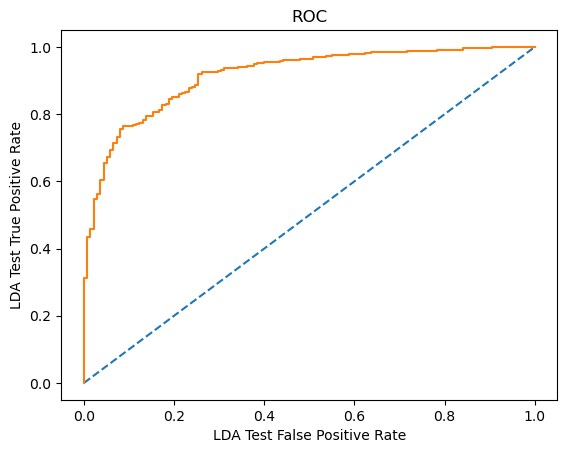

In [96]:
# predict probabilities
pred_prob_test = LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
pred_prob_test = pred_prob_test[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, pred_prob_test)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = roc_curve(y_test, pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)
plt.xlabel('LDA Test False Positive Rate')
plt.ylabel('LDA Test True Positive Rate')
plt.title('ROC')
plt.show()

To improve the model results change the cut-off values for maximum accuracy?

In [97]:
# Training Data Probability Prediction
pred_prob_train1 = LDA.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test1 = LDA.predict_proba(X_test)

0.1 

Accuracy Score 0.7427
F1 Score 0.8427 

Confusion Matrix


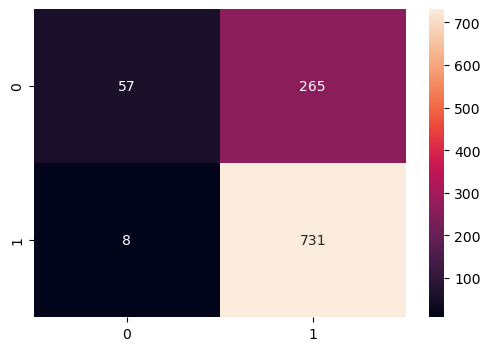

0.2 

Accuracy Score 0.7823
F1 Score 0.8613 

Confusion Matrix


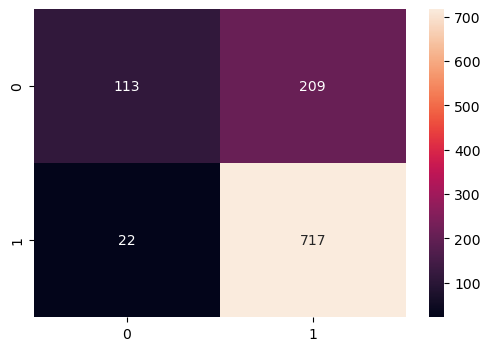

0.3 

Accuracy Score 0.804
F1 Score 0.8705 

Confusion Matrix


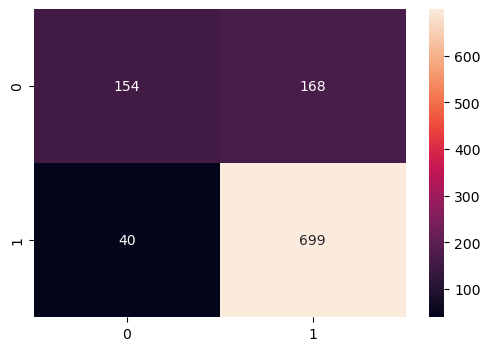

0.4 

Accuracy Score 0.8209
F1 Score 0.8774 

Confusion Matrix


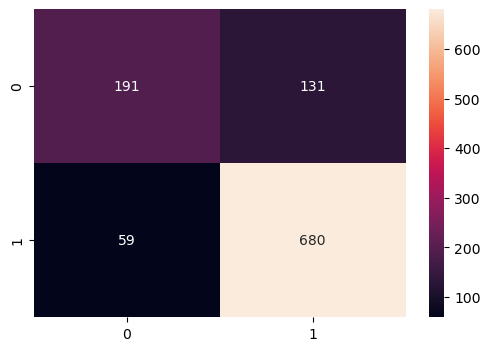

0.5 

Accuracy Score 0.8228
F1 Score 0.8743 

Confusion Matrix


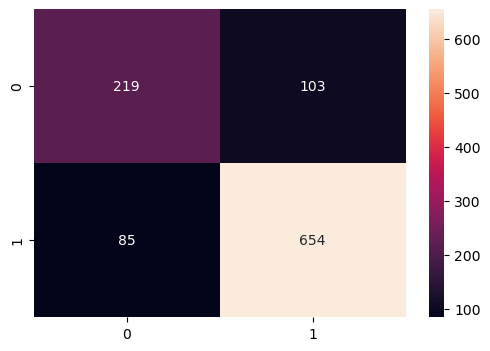

0.6 

Accuracy Score 0.8181
F1 Score 0.8672 

Confusion Matrix


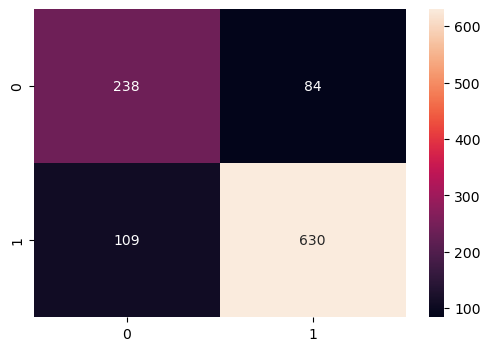

0.7 

Accuracy Score 0.8124
F1 Score 0.8569 

Confusion Matrix


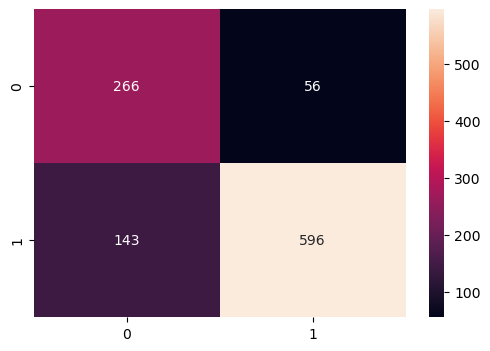

0.8 

Accuracy Score 0.7568
F1 Score 0.8028 

Confusion Matrix


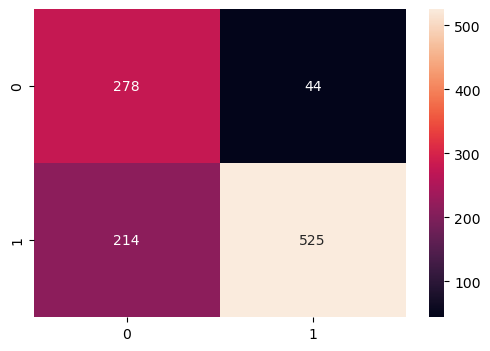

0.9 

Accuracy Score 0.6758
F1 Score 0.7099 

Confusion Matrix


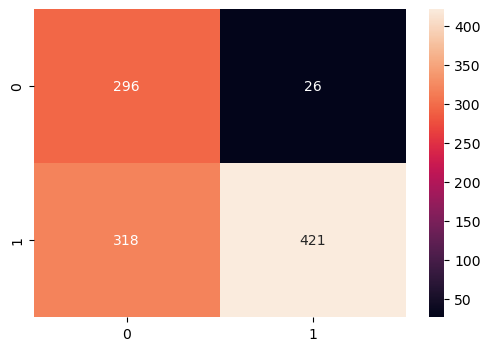

In [98]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train1[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

- After performing iterations by changing the probability cut-off; we see that 0.4 and 0.5 gives better accuracy than the rest of the custom cut-off values. But 0.4 cut-off gives us the best 'f1-score'. Hence, we will take the cut-off as 0.4 to get the optimum 'f1' score in order to improve the test set results

In [99]:
#Predicting the classes on the test data with a cut-off value of 0.4
data_pred_custom_cutoff=[] #defining an empty list
for i in range(0,len(pred_prob_test1[:,1])):#defining a loop for the length of the test data
    if np.array(pred_prob_test1[:,1])[i]>0.4: #issuing a condition for our probability values to be
        a=1 #if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0 #if the probability values are less than the custom cutoff then the value should be 0
    data_pred_custom_cutoff.append(a) #adding either 1 or 0 based on the condition to the end of the list defined by us

Accuracy for Linear Discriminant Analysis model on Testing set with cut-off value 0.4 is 
 0.849


Classification report for Linear Discriminant Analysis model on Testing set with cut-off value 0.4 is 
               precision    recall  f1-score   support

           0       0.83      0.62      0.71       138
           1       0.85      0.95      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.78      0.81       456
weighted avg       0.85      0.85      0.84       456



Confusion Matrix for Linear Discriminant Analysis model on Testing set with cut-off value 0.4 is


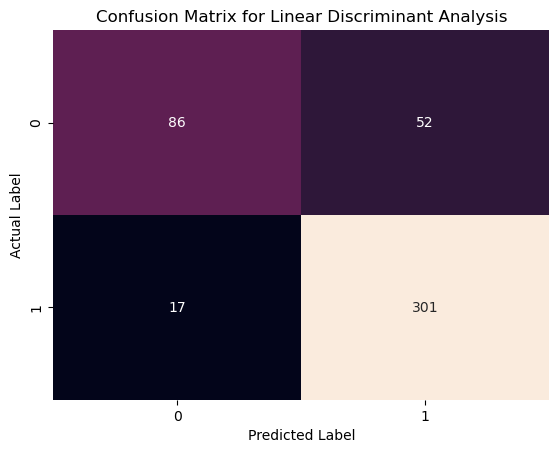

LDA_test_precision_new  0.85
LDA_test_recall_new  0.95
LDA_test_f1_new  0.9


In [100]:
# Predictions on test data with cut-off value 0.4
models_names={LDA:'Linear Discriminant Analysis'}

print('Accuracy for {} model on Testing set with cut-off value 0.4 is'.format(models_names[LDA]),'\n',round(accuracy_score(y_test,data_pred_custom_cutoff),3))
print('\n')
print('Classification report for {} model on Testing set with cut-off value 0.4 is'.format(models_names[LDA]),'\n',classification_report(y_test,data_pred_custom_cutoff))
print('\n')
print('Confusion Matrix for {} model on Testing set with cut-off value 0.4 is'.format(models_names[LDA]))
sns.heatmap(confusion_matrix(y_test,data_pred_custom_cutoff),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LDA]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LDA_metrics_test_new=classification_report(y_test, data_pred_custom_cutoff,output_dict=True)
df=pd.DataFrame(LDA_metrics_test_new).transpose()
LDA_test_f1_new=round(df.loc["1"][2],2)
LDA_test_recall_new=round(df.loc["1"][1],2)
LDA_test_precision_new=round(df.loc["1"][0],2)
print ('LDA_test_precision_new ',LDA_test_precision_new)
print ('LDA_test_recall_new ',LDA_test_recall_new)
print ('LDA_test_f1_new ',LDA_test_f1_new)

In [101]:
LDA_test_acc_new = round(accuracy_score(y_test,data_pred_custom_cutoff),3)
LDA_test_acc_new

0.849

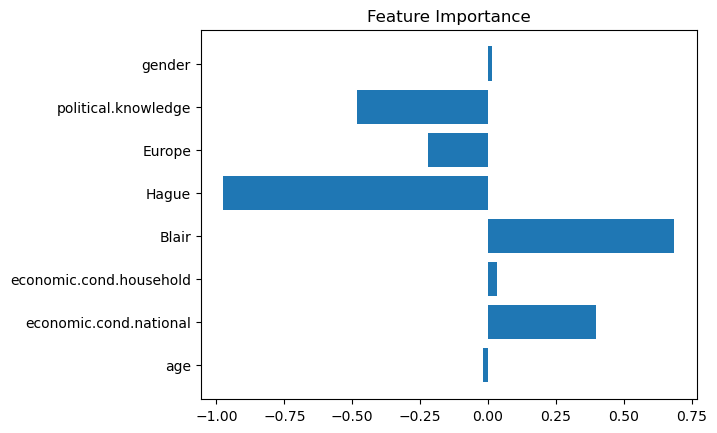

In [102]:
plt.title('Feature Importance')
plt.barh(X_train.columns, LDA.coef_[0]);

In [103]:
data = {
    'Model': ['Train set', 'Test set', 'Improved Test set'],
    'Accuracy in %': [82.3, 86, 84.9],
    'AUC in %': [87.7, 91.5, None],
    'Precision in %': [86, 88, 85],
    'Recall in %': [88, 93, 95],
    'f1-Score': [87, 90, 90]
}

# Create a DataFrame
DF2 = pd.DataFrame(data)
DF2.set_index('Model', inplace=True)  # Set 'Model' as the index
DF2.index.name = 'Linear Discriminant Analysis Conclusion:'  # Add the title
# Display the DataFrame
DF2

Accuracy in %  AUC in %  \
Linear Discriminant Analysis Conclusion:                            
Train set                                          82.3      87.7   
Test set                                           86.0      91.5   
Improved Test set                                  84.9       NaN   

                                          Precision in %  Recall in %  \
Linear Discriminant Analysis Conclusion:                                
Train set                                             86           88   
Test set                                              88           93   
Improved Test set                                     85           95   

                                          f1-Score  
Linear Discriminant Analysis Conclusion:            
Train set                                       87  
Test set                                        90  
Improved Test set                               90

- Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

In [104]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame(
    {'LR Train'     : [LR_train_acc,LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
     'LR Test'      : [LR_test_acc,LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
     'LDA Train'    : [LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
     'LDA Test[0.5]': [LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
     'LDA Test[0.4]': [LDA_test_acc_new,np.nan,LDA_test_recall_new,LDA_test_precision_new,LDA_test_f1_new]
    },index=index)
round(data,2)

LR Train  LR Test  LDA Train  LDA Test[0.5]  LDA Test[0.4]
Accuracy       0.83     0.86       0.82           0.86           0.85
AUC            0.88     0.91       0.88           0.91            NaN
Recall         0.90     0.93       0.88           0.93           0.95
Precision      0.86     0.87       0.86           0.88           0.85
F1 Score       0.88     0.90       0.87           0.90           0.90

#### Model Evaluation- Naive Bayes

Training set - NB

Accuracy for Naive Bayes model on Training set is 
 0.82


Classification report for Naive Bayes model on Training set is 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       322
           1       0.87      0.88      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



Confusion Matrix for Naive Bayes model on Training set is


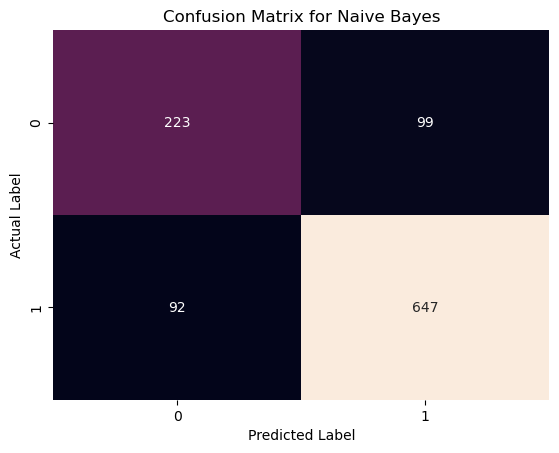

NB_train_precision  0.87
NB_train_recall  0.88
NB_train_f1  0.87


In [105]:
models_names={NB_model:'Naive Bayes'}

print('Accuracy for {} model on Training set is'.format(models_names[NB_model]),'\n',round(accuracy_score(y_train,ytrain_predict_NB),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[NB_model]),'\n',classification_report(y_train,ytrain_predict_NB))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[NB_model]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict_NB),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[NB_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

NB_metrics=classification_report(y_train, ytrain_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_f1=round(df.loc["1"][2],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_precision=round(df.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

AUC and ROC for the train data - NB

AUC: 0.874


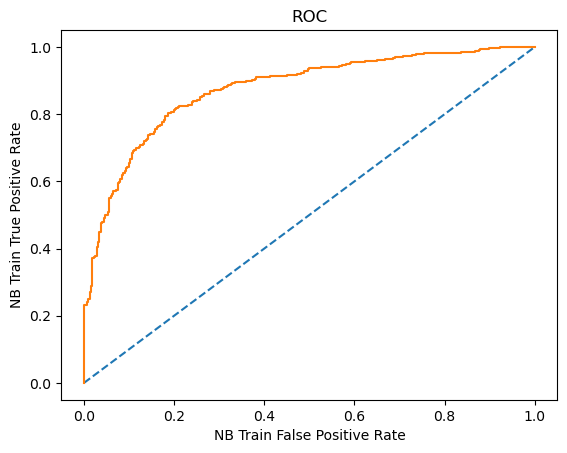

In [106]:
# predict probabilities
ytrain_predict_prob_NB =NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob_NB = ytrain_predict_prob_NB[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train, ytrain_predict_prob_NB)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_train_thresholds = roc_curve(y_train, ytrain_predict_prob_NB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr)
plt.xlabel('NB Train False Positive Rate')
plt.ylabel('NB Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - NB

Accuracy for Naive Bayes model on Testing set is 
 0.855


Classification report for Naive Bayes model on Testing set is 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       138
           1       0.88      0.91      0.90       318

    accuracy                           0.86       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.85      0.86      0.85       456



Confusion Matrix for Naive Bayes model on Testing set is


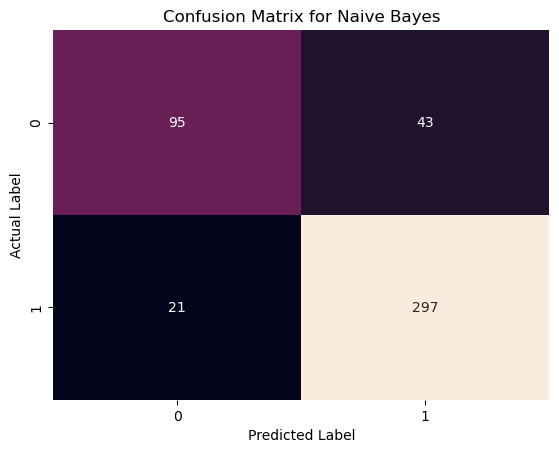

NB_test_precision  0.88
NB_test_recall  0.91
NB_test_f1  0.9


In [107]:
models_names={NB_model:'Naive Bayes'}

print('Accuracy for {} model on Testing set is'.format(models_names[NB_model]),'\n',round(accuracy_score(y_test,ytest_predict_NB),3))
print('\n')
print('Classification report for {} model on Testing set is'.format(models_names[NB_model]),'\n',classification_report(y_test,ytest_predict_NB))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[NB_model]))
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[NB_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

NB_metrics_test=classification_report(y_test, ytest_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics_test).transpose()
NB_test_f1=round(df.loc["1"][2],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_precision=round(df.loc["1"][0],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

AUC and ROC for the test data - NB

AUC: 0.913


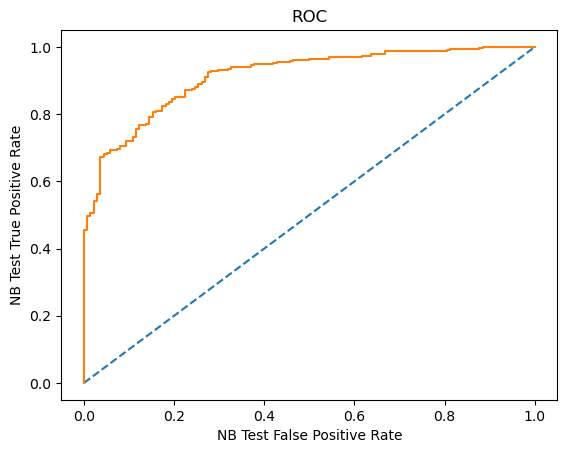

In [108]:
# predict probabilities
ytest_predict_prob_NB=NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob_NB = ytest_predict_prob_NB[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test, ytest_predict_prob_NB)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_test_thresholds = roc_curve(y_test, ytest_predict_prob_NB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr)
plt.xlabel('NB Test False Positive Rate')
plt.ylabel('NB Test True Positive Rate')
plt.title('ROC')
plt.show()

We should increase the Model Accuracy to maximum

In [109]:
# Training Data Probability Prediction
pred_prob_train_NB = NB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_NB = NB_model.predict_proba(X_test)

0.1 

Accuracy Score 0.7691
F1 Score 0.8534 

Confusion Matrix


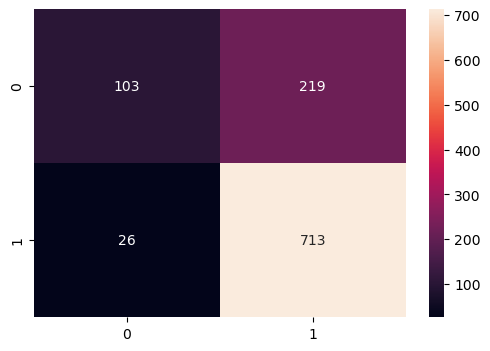

0.2 

Accuracy Score 0.7898
F1 Score 0.8616 

Confusion Matrix


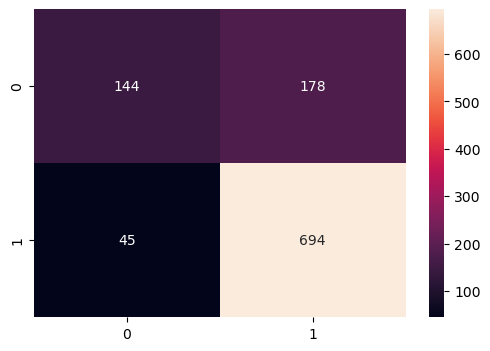

0.3 

Accuracy Score 0.8058
F1 Score 0.8678 

Confusion Matrix


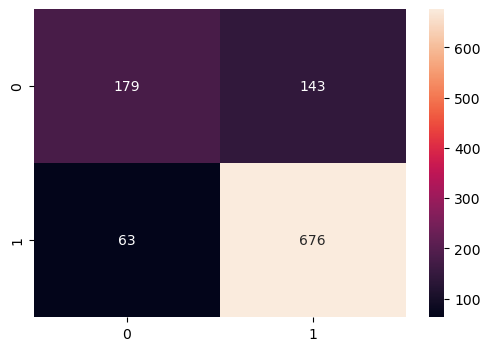

0.4 

Accuracy Score 0.819
F1 Score 0.8734 

Confusion Matrix


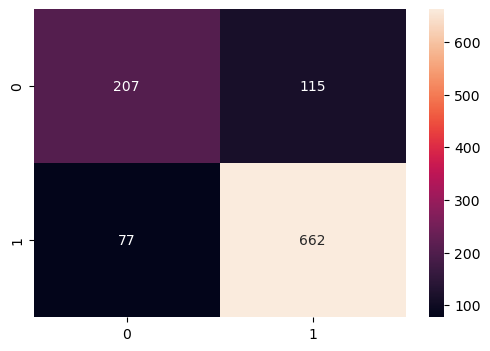

0.5 

Accuracy Score 0.82
F1 Score 0.8714 

Confusion Matrix


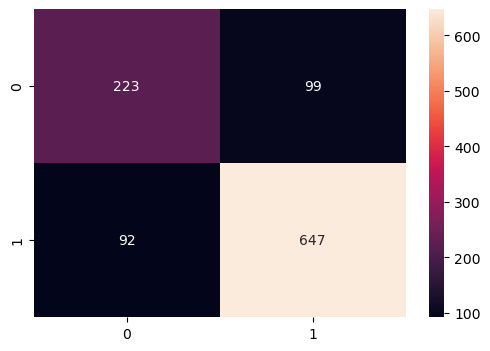

0.6 

Accuracy Score 0.8134
F1 Score 0.8629 

Confusion Matrix


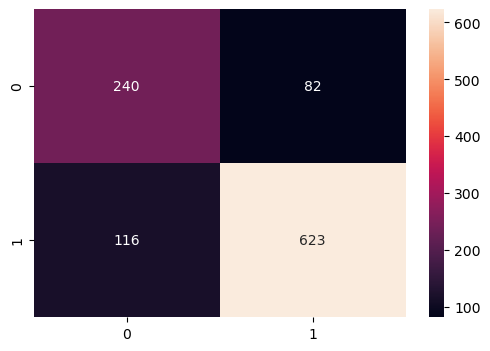

0.7 

Accuracy Score 0.8058
F1 Score 0.8529 

Confusion Matrix


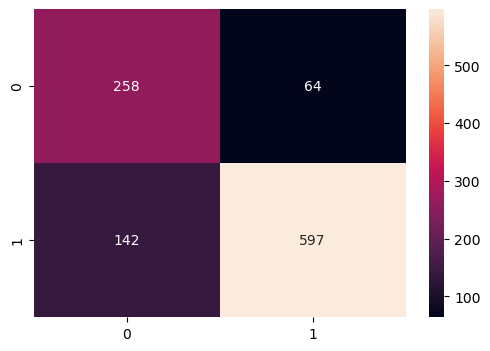

0.8 

Accuracy Score 0.7729
F1 Score 0.8197 

Confusion Matrix


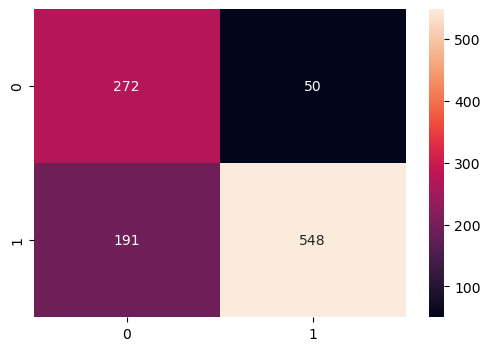

0.9 

Accuracy Score 0.7229
F1 Score 0.7644 

Confusion Matrix


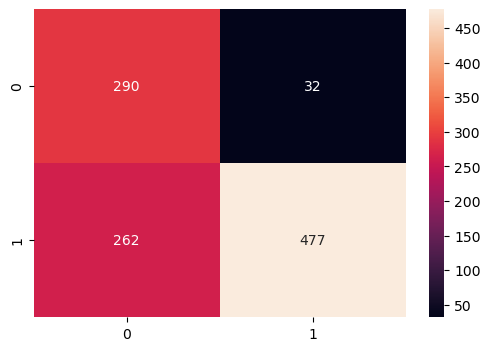

In [110]:
for j in np.arange(0.1,1,0.1):
    custom_prob_NB = j #defining the cut-off value of our choice
    custom_cutoff_data_NB=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train_NB[:,1])[i] > custom_prob_NB:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data_NB.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data_NB),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data_NB),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data_NB),annot=True,fmt='.4g'),'\n\n'
    plt.show();

- After performing iterations by changing the probability cut-off; we see that 0.4 and 0.5 gives better accuracy than the rest of the custom cut-off values. But 0.4 cut-off gives us the best 'f1-score'. Hence, we will take the cut-off as 0.4 to get the optimum 'f1' score in order to improve the test set results

In [111]:
data_pred_custom_cutoff_NB=[] #defining an empty list
for i in range(0,len(pred_prob_test_NB[:,1])):#defining a loop for the length of the test data
    if np.array(pred_prob_test_NB[:,1])[i]>0.4: #issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1 #if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0 #if the probability values are less than the custom cutoff then the value should be 0
    data_pred_custom_cutoff_NB.append(a) #adding either 1 or 0 based on the condition to the end of the list defined by us

Accuracy for Naive Bayes model on Testing set with cut-off value 0.4 is 
 0.855


Classification report for Naive Bayes model on Testing set with cut-off value 0.4 is 
               precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



Confusion Matrix for Naive Bayes model on Testing set with cut-off value 0.4 is


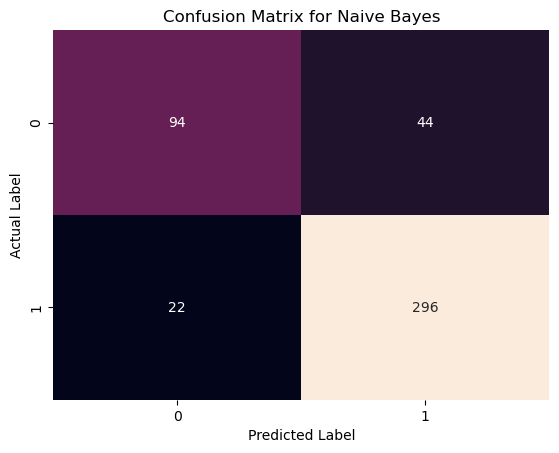

NB_test_precision_new  0.87
NB_test_recall_new  0.93
NB_test_f1_new  0.9


In [112]:
models_names={NB_model:'Naive Bayes'}

print('Accuracy for {} model on Testing set with cut-off value 0.4 is'.format(models_names[NB_model]),'\n',round(accuracy_score(y_test,data_pred_custom_cutoff_NB),3))
print('\n')
print('Classification report for {} model on Testing set with cut-off value 0.4 is'.format(models_names[NB_model]),'\n',classification_report(y_test,data_pred_custom_cutoff_NB))
print('\n')
print('Confusion Matrix for {} model on Testing set with cut-off value 0.4 is'.format(models_names[NB_model]))
sns.heatmap(confusion_matrix(y_test,data_pred_custom_cutoff_NB),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[NB_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

NB_metrics_test_new=classification_report(y_test, data_pred_custom_cutoff_NB,output_dict=True)
df=pd.DataFrame(NB_metrics_test_new).transpose()
NB_test_f1_new=round(df.loc["1"][2],2)
NB_test_recall_new=round(df.loc["1"][1],2)
NB_test_precision_new=round(df.loc["1"][0],2)
print ('NB_test_precision_new ',NB_test_precision_new)
print ('NB_test_recall_new ',NB_test_recall_new)
print ('NB_test_f1_new ',NB_test_f1_new)

In [113]:
NB_test_acc_new = round(accuracy_score(y_test,data_pred_custom_cutoff_NB),3)
NB_test_acc_new

0.855

In [114]:
data = {
    'Model': ['Train set', 'Test set', 'Improved Test set'],
    'Accuracy in %': [82, 85.5, 85.5],
    'AUC in %': [87.4, 91.3, None],
    'Precision in %': [87, 88, 87],
    'Recall in %': [88, 91, 91],
    'f1-Score': [87, 90, 90]
}

# Create a DataFrame
DF3 = pd.DataFrame(data)
DF3.set_index('Model', inplace=True)  # Set 'Model' as the index
DF3.index.name = 'Naive Bayes Analysis Conclusion:'  # Add the title
# Display the DataFrame
DF3

Accuracy in %  AUC in %  Precision in %  \
Naive Bayes Analysis Conclusion:                                            
Train set                                  82.0      87.4              87   
Test set                                   85.5      91.3              88   
Improved Test set                          85.5       NaN              87   

                                  Recall in %  f1-Score  
Naive Bayes Analysis Conclusion:                         
Train set                                  88        87  
Test set                                   91        90  
Improved Test set                          91        90

- Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

#### Model Evaluation- KNN Model

Training set - KNN

Accuracy for K-nearest neighbour model on Training set is 
 0.838


Classification report for K-nearest neighbour model on Training set is 
               precision    recall  f1-score   support

           0       0.74      0.71      0.73       322
           1       0.88      0.89      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



Confusion Matrix for K-nearest neighbour model on Training set is


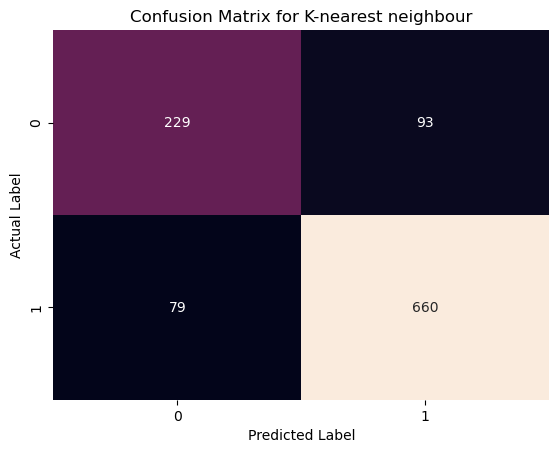

KNN_train_precision  0.88
KNN_train_recall  0.89
KNN_train_f1  0.88


In [115]:
models_names={KNN_model:'K-nearest neighbour'}

print('Accuracy for {} model on Training set is'.format(models_names[KNN_model]),'\n',round(accuracy_score(y_train,ytrain_predict_KNN),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[KNN_model]),'\n',classification_report(y_train,ytrain_predict_KNN))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[KNN_model]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict_KNN),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[KNN_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

KNN_metrics=classification_report(y_train, ytrain_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_f1=round(df.loc["1"][2],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_precision=round(df.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

AUC and ROC for the train data - KNN

AUC: 0.905


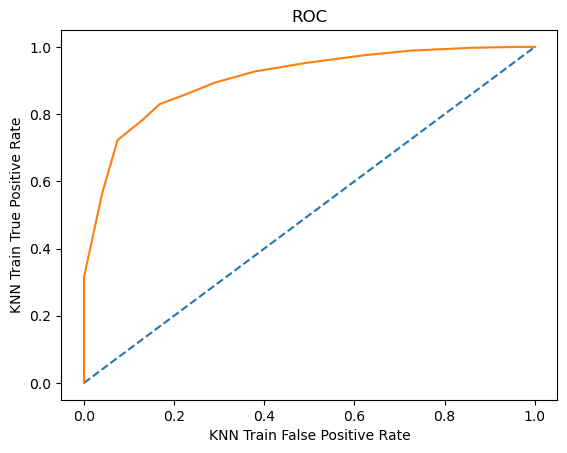

In [116]:
# predict probabilities
ytrain_predict_prob_KNN =KNN_model.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
ytrain_predict_prob_KNN = ytrain_predict_prob_KNN[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train, ytrain_predict_prob_KNN)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_train_thresholds = roc_curve(y_train, ytrain_predict_prob_KNN)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)
plt.xlabel('KNN Train False Positive Rate')
plt.ylabel('KNN Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - KNN

Accuracy for K-nearest neighbour model on Test set is 
 0.864


Classification report for K-nearest neighbour model on Test set is 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       138
           1       0.90      0.91      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.84      0.84       456
weighted avg       0.86      0.86      0.86       456



Confusion Matrix for K-nearest neighbour model on Test set is


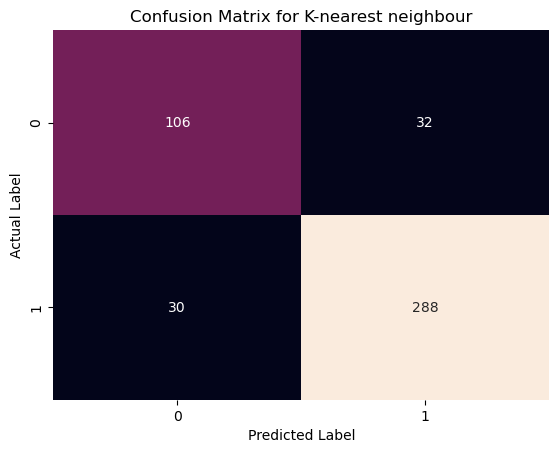

KNN_test_precision  0.9
KNN_test_recall  0.91
KNN_test_f1  0.9


In [117]:
models_names={KNN_model:'K-nearest neighbour'}

print('Accuracy for {} model on Test set is'.format(models_names[KNN_model]),'\n',round(accuracy_score(y_test,ytest_predict_KNN),3))
print('\n')
print('Classification report for {} model on Test set is'.format(models_names[KNN_model]),'\n',classification_report(y_test,ytest_predict_KNN))
print('\n')
print('Confusion Matrix for {} model on Test set is'.format(models_names[KNN_model]))
sns.heatmap(confusion_matrix(y_test,ytest_predict_KNN),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[KNN_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

KNN_metrics=classification_report(y_test, ytest_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_f1=round(df.loc["1"][2],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_precision=round(df.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

AUC and ROC for the test data - KNN

AUC: 0.892


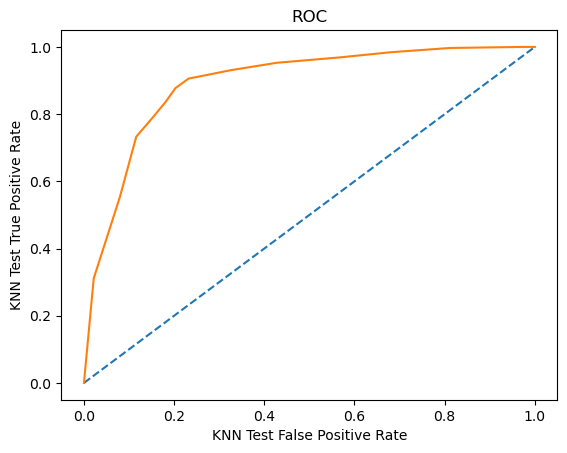

In [118]:
# predict probabilities
ytest_predict_prob_KNN =KNN_model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
ytest_predict_prob_KNN = ytest_predict_prob_KNN[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, ytest_predict_prob_KNN)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_test_thresholds = roc_curve(y_test, ytest_predict_prob_KNN)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)
plt.xlabel('KNN Test False Positive Rate')
plt.ylabel('KNN Test True Positive Rate')
plt.title('ROC')
plt.show()

In [119]:
scores_train = []
scores_test = []
for k in range(1, 30, 2):
  KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  KNN.fit(X_train_scaled, y_train)
  scores_train.append(KNN.score(X_train_scaled, y_train))
  scores_test.append(KNN.score(X_test_scaled, y_test))

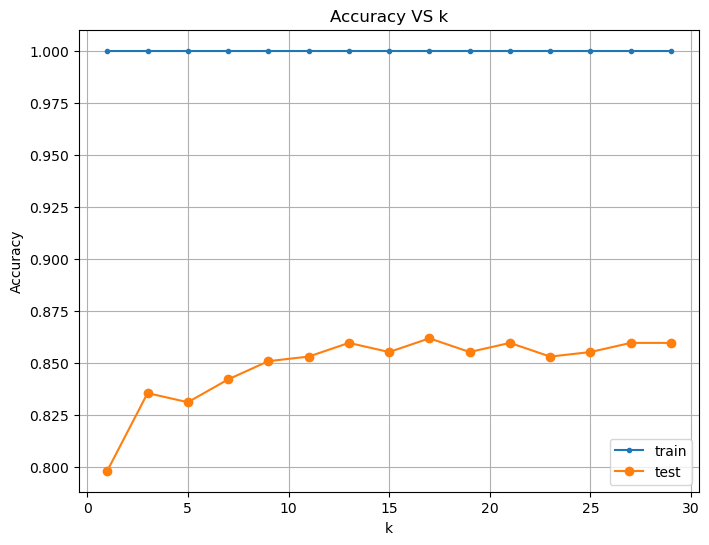

In [120]:
plt.figure(figsize = [8, 6])
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.title('Accuracy VS k')
plt.plot(range(1, 30, 2), scores_train, marker = '.', label = 'train')
plt.plot(range(1, 30, 2), scores_test, marker = 'o', label = 'test')
plt.legend()
plt.grid();

In [121]:
scores_train = []
scores_test = []
for k in range(1, 30, 2):
  KNN = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
  KNN.fit(X_train_scaled, y_train)
  scores_train.append(KNN.score(X_train_scaled, y_train))
  scores_test.append(KNN.score(X_test_scaled, y_test))

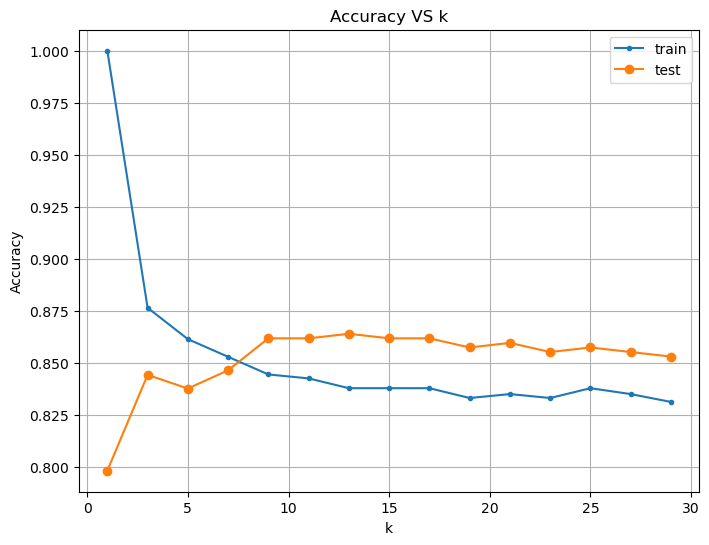

In [122]:
plt.figure(figsize = [8, 6])
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.title('Accuracy VS k')
plt.plot(range(1, 30, 2), scores_train, marker = '.', label = 'train')
plt.plot(range(1, 30, 2), scores_test, marker = 'o', label = 'test')
plt.legend()
plt.grid();

In [123]:
data = {
    'Model': ['Train set', 'Test set'],
    'Accuracy in %': [83.8, 86.4],
    'AUC in %': [90.5, 89.2],
    'Precision in %': [88, 90],
    'Recall in %': [89, 91],
    'f1-Score': [88, 90]
}

# Create a DataFrame
DF4 = pd.DataFrame(data)
DF4.set_index('Model', inplace=True)  # Set 'Model' as the index
DF4.index.name = 'K-nearest neighbors kNN Conclusion:'
# Display the DataFrame
DF4

Accuracy in %  AUC in %  Precision in %  \
K-nearest neighbors kNN Conclusion:                                            
Train set                                     83.8      90.5              88   
Test set                                      86.4      89.2              90   

                                     Recall in %  f1-Score  
K-nearest neighbors kNN Conclusion:                         
Train set                                     89        88  
Test set                                      91        90

- Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

In [124]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame(
    {'NB Train'     : [NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
     'NB Test[0.5]'      : [NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
     'NB Test[0.4]'    : [NB_test_acc_new,np.nan,NB_test_recall_new,NB_test_precision_new,NB_test_f1_new],
     'KNN Train': [KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
     'KNN Test': [KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1]
    },index=index)
round(data,2)

NB Train  NB Test[0.5]  NB Test[0.4]  KNN Train  KNN Test
Accuracy       0.82          0.86          0.86       0.84      0.86
AUC            0.87          0.91           NaN       0.90      0.89
Recall         0.88          0.91          0.93       0.89      0.91
Precision      0.87          0.88          0.87       0.88      0.90
F1 Score       0.87          0.90          0.90       0.88      0.90

#### Model Evaluation Random-Forest

Training set - Random Forest

Accuracy for RandomForestClassifier model on Training set is 
 0.815


Classification report for RandomForestClassifier model on Training set is 
               precision    recall  f1-score   support

           0       0.76      0.57      0.65       322
           1       0.83      0.92      0.87       739

    accuracy                           0.82      1061
   macro avg       0.80      0.75      0.76      1061
weighted avg       0.81      0.82      0.81      1061



Confusion Matrix for RandomForestClassifier model on Training set is


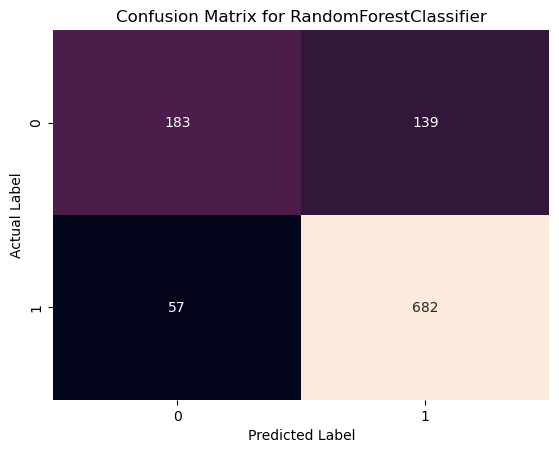

RF_train_precision  0.83
RF_train_recall  0.92
RF_train_f1  0.87


In [125]:
models_names={rfcl:'RandomForestClassifier'}

print('Accuracy for {} model on Training set is'.format(models_names[rfcl]),'\n',round(accuracy_score(y_train,ytrain_predict_rf),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[rfcl]),'\n',classification_report(y_train,ytrain_predict_rf))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[rfcl]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict_rf),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

RF_metrics=classification_report(y_train, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
RF_train_f1=round(df.loc["1"][2],2)
RF_train_recall=round(df.loc["1"][1],2)
RF_train_precision=round(df.loc["1"][0],2)
print ('RF_train_precision ',RF_train_precision)
print ('RF_train_recall ',RF_train_recall)
print ('RF_train_f1 ',RF_train_f1)

AUC and ROC for the train data -RF

AUC: 0.884


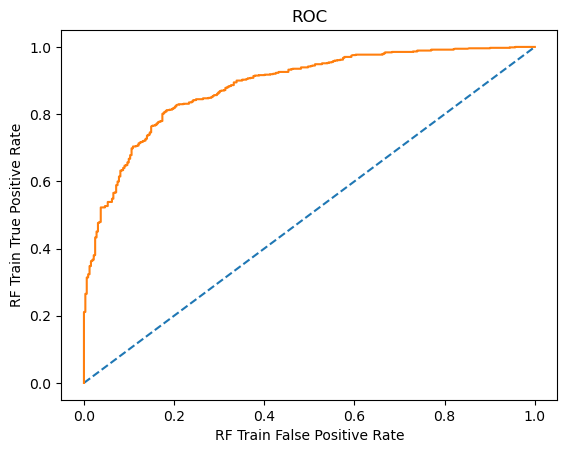

In [126]:
# predict probabilities
ytrain_predict_prob_rf=rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob_rf = ytrain_predict_prob_rf[:, 1]
# calculate AUC
RF_train_auc = roc_auc_score(y_train, ytrain_predict_prob_rf)
print('AUC: %.3f' % RF_train_auc)
# calculate roc curve
RF_train_fpr, RF_train_tpr, RF_train_thresholds = roc_curve(y_train, ytrain_predict_prob_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_train_fpr, RF_train_tpr)
plt.xlabel('RF Train False Positive Rate')
plt.ylabel('RF Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - RandomForest

Accuracy for RandomForestClassifier model on Test set is 
 0.836


Classification report for RandomForestClassifier model on Test set is 
               precision    recall  f1-score   support

           0       0.81      0.59      0.69       138
           1       0.84      0.94      0.89       318

    accuracy                           0.84       456
   macro avg       0.83      0.77      0.79       456
weighted avg       0.83      0.84      0.83       456



Confusion Matrix for RandomForestClassifier model on Testing set is


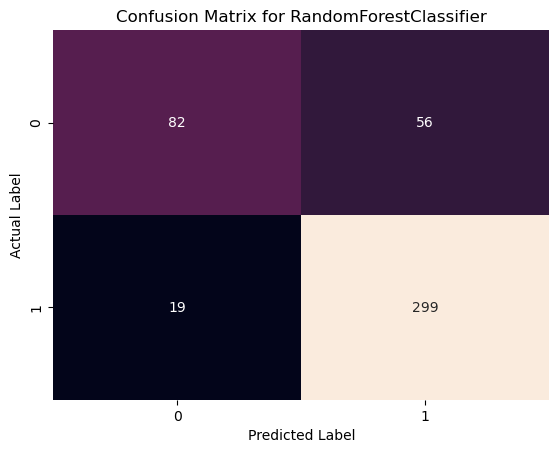

RF_test_precision  0.84
RF_test_recall  0.94
RF_test_f1  0.89


In [127]:
models_names={rfcl:'RandomForestClassifier'}

print('Accuracy for {} model on Test set is'.format(models_names[rfcl]),'\n',round(accuracy_score(y_test,ytest_predict_rf),3))
print('\n')
print('Classification report for {} model on Test set is'.format(models_names[rfcl]),'\n',classification_report(y_test,ytest_predict_rf))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[rfcl]))
sns.heatmap(confusion_matrix(y_test,ytest_predict_rf),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

RF_metrics_test=classification_report(y_test, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(RF_metrics_test).transpose()
RF_test_f1=round(df.loc["1"][2],2)
RF_test_recall=round(df.loc["1"][1],2)
RF_test_precision=round(df.loc["1"][0],2)
print ('RF_test_precision ',RF_test_precision)
print ('RF_test_recall ',RF_test_recall)
print ('RF_test_f1 ',RF_test_f1)

AUC and ROC for the test data RF

AUC: 0.906


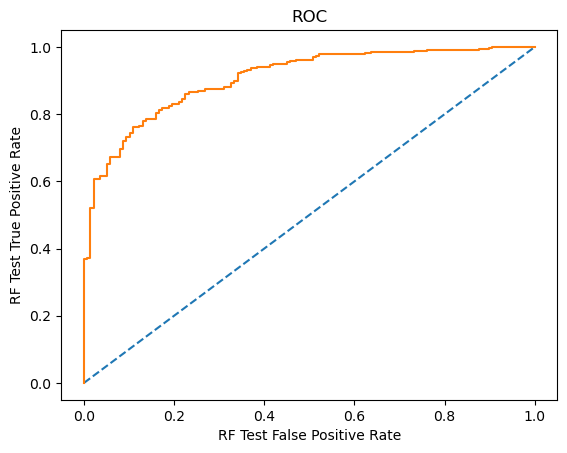

In [128]:
# predict probabilities
ytest_predict_prob_rf=rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob_rf = ytest_predict_prob_rf[:, 1]
# calculate AUC
RF_test_auc = roc_auc_score(y_test, ytest_predict_prob_rf)
print('AUC: %.3f' % RF_test_auc)
# calculate roc curve
RF_test_fpr, RF_test_tpr, RF_test_thresholds = roc_curve(y_test, ytest_predict_prob_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_test_fpr, RF_test_tpr)
plt.xlabel('RF Test False Positive Rate')
plt.ylabel('RF Test True Positive Rate')
plt.title('ROC')
plt.show()

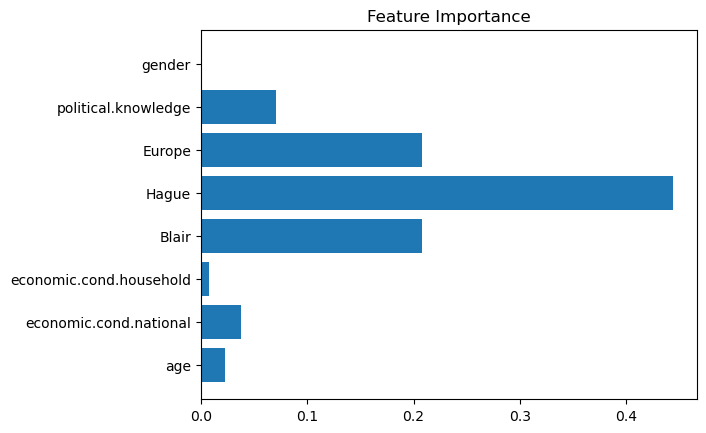

In [129]:
plt.title('Feature Importance')
plt.barh(X_train.columns, rfcl.feature_importances_);

In [130]:
data = {
    'Model': ['Train set', 'Test set'],
    'Accuracy in %': [81.5, 83.6],
    'AUC in %': [88.4, 90.6],
    'Precision in %': [83, 84],
    'Recall in %': [92, 94],
    'f1-Score': [87, 89]
}

# Create a DataFrame
DF5 = pd.DataFrame(data)
DF5.set_index('Model', inplace=True)  # Set 'Model' as the index
DF5.index.name = 'Random Forest Conclusion:'
# Display the DataFrame
DF5

Accuracy in %  AUC in %  Precision in %  \
Random Forest Conclusion:                                            
Train set                           81.5      88.4              83   
Test set                            83.6      90.6              84   

                           Recall in %  f1-Score  
Random Forest Conclusion:                         
Train set                           92        87  
Test set                            94        89

#### Model Evaluation Bagging using base estimator has RF

Training set - Bagging

Accuracy for BaggingClassifier model on Training set is 
 0.808


Classification report for BaggingClassifier model on Training set is 
               precision    recall  f1-score   support

           0       0.77      0.52      0.62       322
           1       0.82      0.93      0.87       739

    accuracy                           0.81      1061
   macro avg       0.79      0.73      0.75      1061
weighted avg       0.80      0.81      0.80      1061



Confusion Matrix for BaggingClassifier model on Training set is


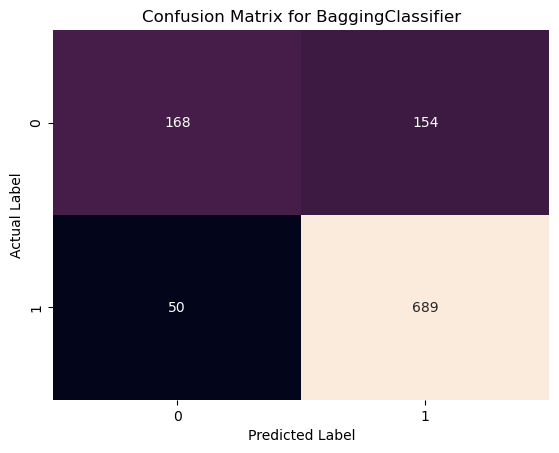

BG_train_precision  0.82
BG_train_recall  0.93
BG_train_f1  0.87


In [131]:
models_names={Bagging_model:'BaggingClassifier'}

print('Accuracy for {} model on Training set is'.format(models_names[Bagging_model]),'\n',round(accuracy_score(y_train,ytrain_predict_bagging),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[Bagging_model]),'\n',classification_report(y_train,ytrain_predict_bagging))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[Bagging_model]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict_bagging),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[Bagging_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

BG_metrics=classification_report(y_train, ytrain_predict_bagging,output_dict=True)
df=pd.DataFrame(BG_metrics).transpose()
BG_train_f1=round(df.loc["1"][2],2)
BG_train_recall=round(df.loc["1"][1],2)
BG_train_precision=round(df.loc["1"][0],2)
print ('BG_train_precision ',BG_train_precision)
print ('BG_train_recall ',BG_train_recall)
print ('BG_train_f1 ',BG_train_f1)

AUC and ROC for the train data -Bagging

AUC: 0.878


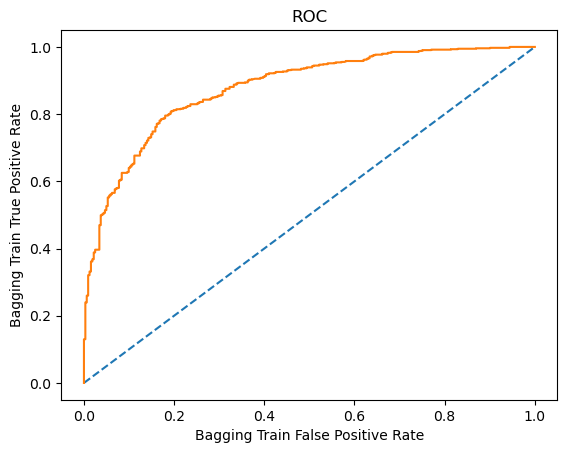

In [132]:
# predict probabilities
ytrain_predict_prob_bg=Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob_bg = ytrain_predict_prob_bg[:, 1]
# calculate AUC
BG_train_auc = roc_auc_score(y_train, ytrain_predict_prob_bg)
print('AUC: %.3f' % BG_train_auc)
# calculate roc curve
BG_train_fpr, BG_train_tpr, BG_train_thresholds = roc_curve(y_train, ytrain_predict_prob_bg)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(BG_train_fpr, BG_train_tpr)
plt.xlabel('Bagging Train False Positive Rate')
plt.ylabel('Bagging Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - Bagging

Accuracy for BaggingClassifier model on Test set is 
 0.84


Classification report for BaggingClassifier model on Test set is 
               precision    recall  f1-score   support

           0       0.84      0.59      0.69       138
           1       0.84      0.95      0.89       318

    accuracy                           0.84       456
   macro avg       0.84      0.77      0.79       456
weighted avg       0.84      0.84      0.83       456



Confusion Matrix for BaggingClassifier model on Testing set is


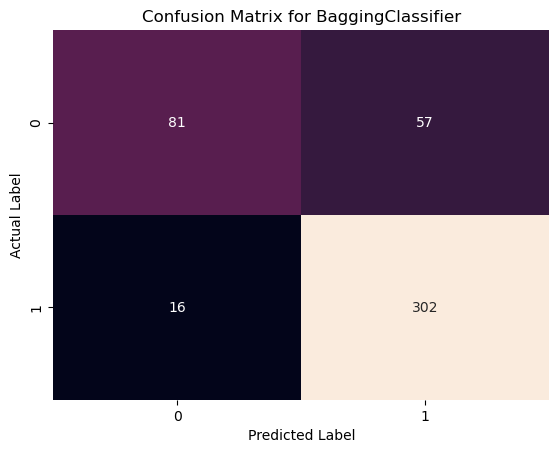

BG_test_precision  0.84
BG_test_recall  0.95
BG_test_f1  0.89


In [133]:
models_names={Bagging_model:'BaggingClassifier'}

print('Accuracy for {} model on Test set is'.format(models_names[Bagging_model]),'\n',round(accuracy_score(y_test,ytest_predict_bagging),3))
print('\n')
print('Classification report for {} model on Test set is'.format(models_names[Bagging_model]),'\n',classification_report(y_test,ytest_predict_bagging))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[Bagging_model]))
sns.heatmap(confusion_matrix(y_test,ytest_predict_bagging),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[Bagging_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

BG_metrics_test=classification_report(y_test, ytest_predict_bagging,output_dict=True)
df=pd.DataFrame(BG_metrics_test).transpose()
BG_test_f1=round(df.loc["1"][2],2)
BG_test_recall=round(df.loc["1"][1],2)
BG_test_precision=round(df.loc["1"][0],2)
print ('BG_test_precision ',BG_test_precision)
print ('BG_test_recall ',BG_test_recall)
print ('BG_test_f1 ',BG_test_f1)

AUC and ROC for the test data -Bagging

AUC: 0.903


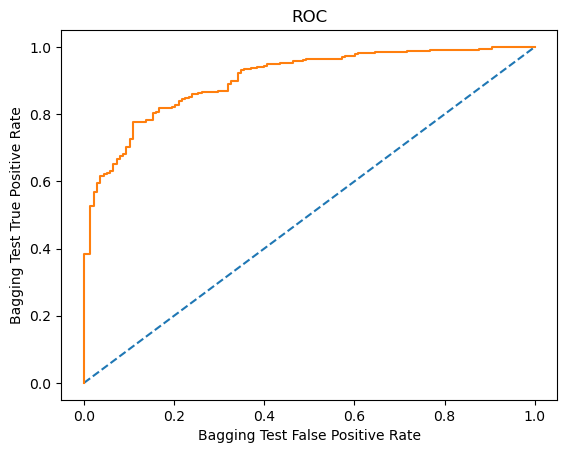

In [134]:
# predict probabilities
ytest_predict_prob_bg=Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob_bg = ytest_predict_prob_bg[:, 1]
# calculate AUC
BG_test_auc = roc_auc_score(y_test, ytest_predict_prob_bg)
print('AUC: %.3f' % BG_test_auc)
# calculate roc curve
BG_test_fpr, BG_test_tpr, BG_test_thresholds = roc_curve(y_test, ytest_predict_prob_bg)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(BG_test_fpr, BG_test_tpr)
plt.xlabel('Bagging Test False Positive Rate')
plt.ylabel('Bagging Test True Positive Rate')
plt.title('ROC')
plt.show()

In [135]:
data = {
    'Model': ['Train set', 'Test set'],
    'Accuracy in %': [80.8, 84],
    'AUC in %': [87.8, 90.3],
    'Precision in %': [82, 84],
    'Recall in %': [93, 95],
    'f1-Score': [87, 89]
}

# Create a DataFrame
DF6 = pd.DataFrame(data)
DF6.set_index('Model', inplace=True)  # Set 'Model' as the index
DF6.index.name = 'BaggingClassifier Conclusion:'
# Display the DataFrame
DF6

Accuracy in %  AUC in %  Precision in %  \
BaggingClassifier Conclusion:                                            
Train set                               80.8      87.8              82   
Test set                                84.0      90.3              84   

                               Recall in %  f1-Score  
BaggingClassifier Conclusion:                         
Train set                               93        87  
Test set                                95        89

- Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

#### Model Evaluation-Gradient Boosting

Training set - GB

Accuracy for GradientBoostingClassifier model on Training set is 
 0.886


Classification report for GradientBoostingClassifier model on Training set is 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       322
           1       0.91      0.93      0.92       739

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.88      0.89      0.88      1061



Confusion Matrix for GradientBoostingClassifier model on Training set is


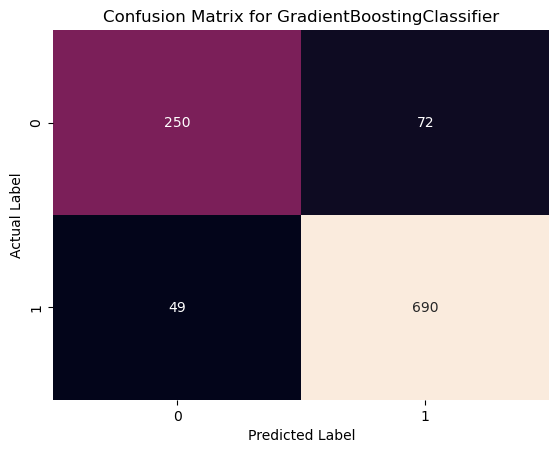

GB_train_precision  0.91
GB_train_recall  0.93
GB_train_f1  0.92


In [136]:
models_names={gbcl:'GradientBoostingClassifier'}

print('Accuracy for {} model on Training set is'.format(models_names[gbcl]),'\n',round(accuracy_score(y_train,ytrain_predict_GB),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[gbcl]),'\n',classification_report(y_train,ytrain_predict_GB))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[gbcl]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict_GB),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[gbcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

GB_metrics=classification_report(y_train, ytrain_predict_GB,output_dict=True)
df=pd.DataFrame(GB_metrics).transpose()
GB_train_f1=round(df.loc["1"][2],2)
GB_train_recall=round(df.loc["1"][1],2)
GB_train_precision=round(df.loc["1"][0],2)
print ('GB_train_precision ',GB_train_precision)
print ('GB_train_recall ',GB_train_recall)
print ('GB_train_f1 ',GB_train_f1)

AUC and ROC for the train data -GB

AUC: 0.947


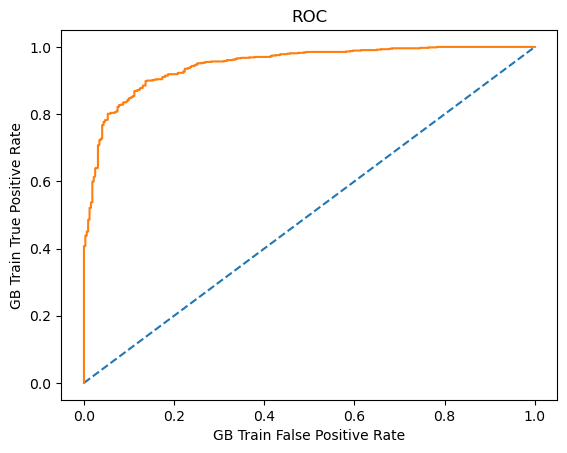

In [137]:
# predict probabilities
ytrain_predict_prob_GB=gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob_GB = ytrain_predict_prob_GB[:, 1]
# calculate AUC
GB_train_auc = roc_auc_score(y_train, ytrain_predict_prob_GB)
print('AUC: %.3f' % GB_train_auc)
# calculate roc curve
GB_train_fpr, GB_train_tpr, GB_train_thresholds = roc_curve(y_train, ytrain_predict_prob_GB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GB_train_fpr, GB_train_tpr)
plt.xlabel('GB Train False Positive Rate')
plt.ylabel('GB Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - GB

Accuracy for GradientBoostingClassifier model on Test set is 
 0.842


Classification report for GradientBoostingClassifier model on Test set is 
               precision    recall  f1-score   support

           0       0.77      0.69      0.73       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



Confusion Matrix for GradientBoostingClassifier model on Testing set is


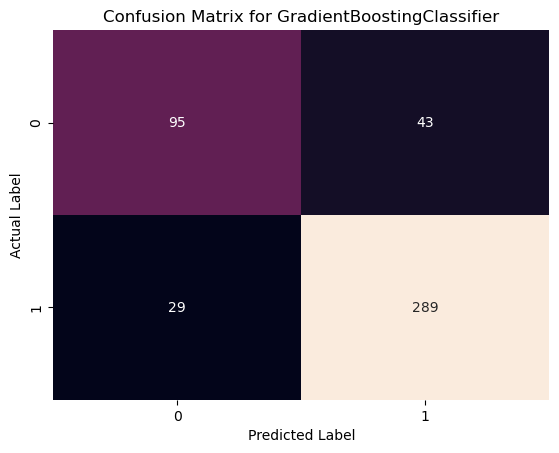

GB_test_precision  0.87
GB_test_recall  0.91
GB_test_f1  0.89


In [138]:
models_names={gbcl:'GradientBoostingClassifier'}

print('Accuracy for {} model on Test set is'.format(models_names[gbcl]),'\n',round(accuracy_score(y_test,ytest_predict_GB),3))
print('\n')
print('Classification report for {} model on Test set is'.format(models_names[gbcl]),'\n',classification_report(y_test,ytest_predict_GB))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[gbcl]))
sns.heatmap(confusion_matrix(y_test,ytest_predict_GB),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[gbcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

GB_metrics_test=classification_report(y_test, ytest_predict_GB,output_dict=True)
df=pd.DataFrame(GB_metrics_test).transpose()
GB_test_f1=round(df.loc["1"][2],2)
GB_test_recall=round(df.loc["1"][1],2)
GB_test_precision=round(df.loc["1"][0],2)
print ('GB_test_precision ',GB_test_precision)
print ('GB_test_recall ',GB_test_recall)
print ('GB_test_f1 ',GB_test_f1)

AUC and ROC for the test data -GB

AUC: 0.904


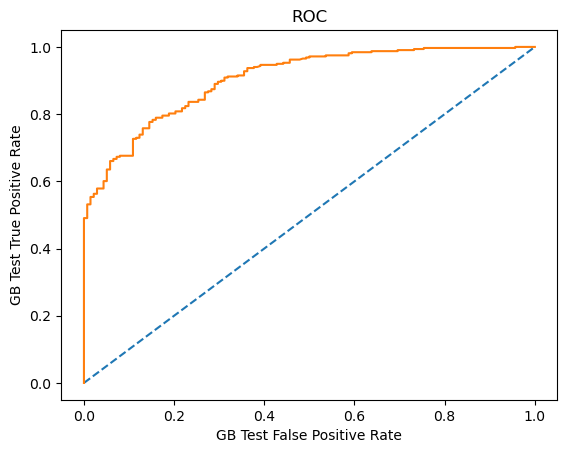

In [139]:
# predict probabilities
ytest_predict_prob_GB=gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob_GB = ytest_predict_prob_GB[:, 1]
# calculate AUC
GB_test_auc = roc_auc_score(y_test, ytest_predict_prob_GB)
print('AUC: %.3f' % GB_test_auc)
# calculate roc curve
GB_test_fpr, GB_test_tpr, GB_test_thresholds = roc_curve(y_test, ytest_predict_prob_GB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GB_test_fpr, GB_test_tpr)
plt.xlabel('GB Test False Positive Rate')
plt.ylabel('GB Test True Positive Rate')
plt.title('ROC')
plt.show()

In [140]:
data = {
    'Model': ['Train set', 'Test set'],
    'Accuracy in %': [88.6, 84.2],
    'AUC in %': [94.7, 90.4],
    'Precision in %': [91, 87],
    'Recall in %': [93, 91],
    'f1-Score': [92, 89]
}

# Create a DataFrame
DF7 = pd.DataFrame(data)
DF7.set_index('Model', inplace=True)  # Set 'Model' as the index
DF7.index.name = 'Gradient Boost Conclusion:'
# Display the DataFrame
DF7

Accuracy in %  AUC in %  Precision in %  \
Gradient Boost Conclusion:                                            
Train set                            88.6      94.7              91   
Test set                             84.2      90.4              87   

                            Recall in %  f1-Score  
Gradient Boost Conclusion:                         
Train set                            93        92  
Test set                             91        89

- Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

#### Model Evaluation-Ada Boost

Training set - AdaBoost

Accuracy for AdaBoostClassifier model on Training set is 
 0.849


Classification report for AdaBoostClassifier model on Training set is 
               precision    recall  f1-score   support

           0       0.78      0.71      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



Confusion Matrix for AdaBoostClassifier model on Training set is


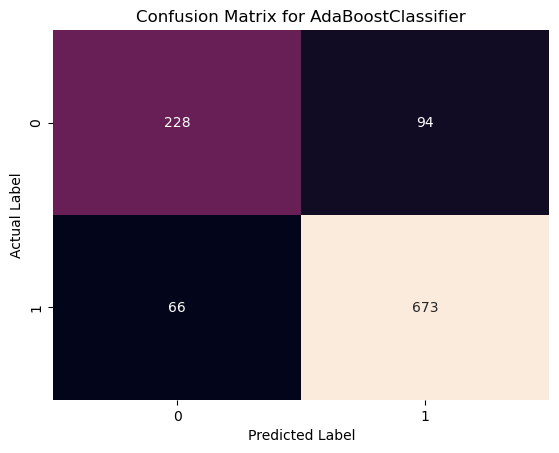

AB_train_precision  0.88
AB_train_recall  0.91
AB_train_f1  0.89


In [141]:
models_names={abcl:'AdaBoostClassifier'}

print('Accuracy for {} model on Training set is'.format(models_names[abcl]),'\n',round(accuracy_score(y_train,ytrain_predict_AB),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[abcl]),'\n',classification_report(y_train,ytrain_predict_AB))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[abcl]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict_AB),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[abcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AB_metrics=classification_report(y_train, ytrain_predict_AB,output_dict=True)
df=pd.DataFrame(AB_metrics).transpose()
AB_train_f1=round(df.loc["1"][2],2)
AB_train_recall=round(df.loc["1"][1],2)
AB_train_precision=round(df.loc["1"][0],2)
print ('AB_train_precision ',AB_train_precision)
print ('AB_train_recall ',AB_train_recall)
print ('AB_train_f1 ',AB_train_f1)

AUC and ROC for the train data -Ada Boost

AUC: 0.904


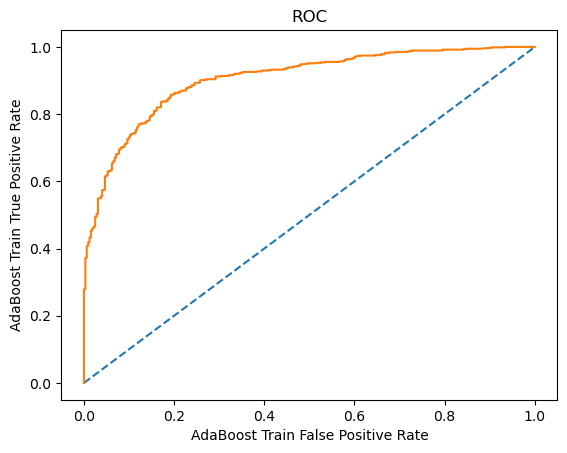

In [142]:
# predict probabilities
ytrain_predict_prob_AB=abcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob_AB = ytrain_predict_prob_AB[:, 1]
# calculate AUC
AB_train_auc = roc_auc_score(y_train, ytrain_predict_prob_AB)
print('AUC: %.3f' % AB_train_auc)
# calculate roc curve
AB_train_fpr, AB_train_tpr, AB_train_thresholds = roc_curve(y_train, ytrain_predict_prob_AB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(AB_train_fpr, AB_train_tpr)
plt.xlabel('AdaBoost Train False Positive Rate')
plt.ylabel('AdaBoost Train True Positive Rate')
plt.title('ROC')
plt.show()

Test set - AdaBoost

Accuracy for AdaBoostClassifier model on Test set is 
 0.836


Classification report for AdaBoostClassifier model on Test set is 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       138
           1       0.87      0.90      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



Confusion Matrix for AdaBoostClassifier model on Testing set is


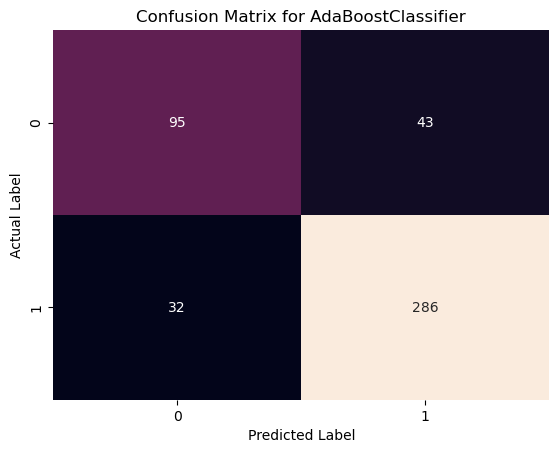

AB_test_precision  0.87
AB_test_recall  0.9
AB_test_f1  0.88


In [143]:
models_names={abcl:'AdaBoostClassifier'}

print('Accuracy for {} model on Test set is'.format(models_names[abcl]),'\n',round(accuracy_score(y_test,ytest_predict_AB),3))
print('\n')
print('Classification report for {} model on Test set is'.format(models_names[abcl]),'\n',classification_report(y_test,ytest_predict_AB))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[abcl]))
sns.heatmap(confusion_matrix(y_test,ytest_predict_AB),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[abcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

AB_metrics_test=classification_report(y_test, ytest_predict_AB,output_dict=True)
df=pd.DataFrame(AB_metrics_test).transpose()
AB_test_f1=round(df.loc["1"][2],2)
AB_test_recall=round(df.loc["1"][1],2)
AB_test_precision=round(df.loc["1"][0],2)
print ('AB_test_precision ',AB_test_precision)
print ('AB_test_recall ',AB_test_recall)
print ('AB_test_f1 ',AB_test_f1)

AUC and ROC for the test data -Ada Boost

AUC: 0.908


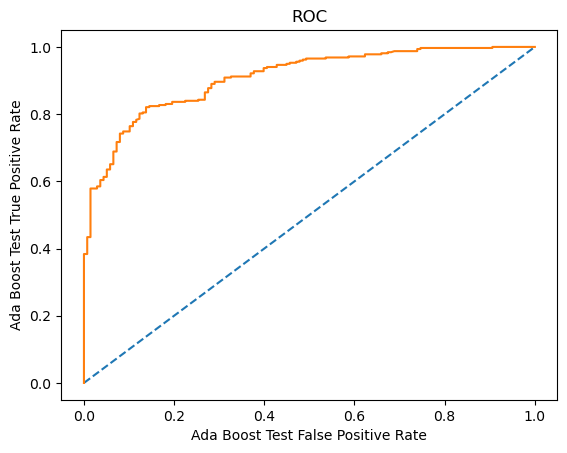

In [144]:
# predict probabilities
ytest_predict_prob_AB=abcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob_AB = ytest_predict_prob_AB[:, 1]
# calculate AUC
AB_test_auc = roc_auc_score(y_test, ytest_predict_prob_AB)
print('AUC: %.3f' % AB_test_auc)
# calculate roc curve
AB_test_fpr, AB_test_tpr, AB_test_thresholds = roc_curve(y_test, ytest_predict_prob_AB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(AB_test_fpr, AB_test_tpr)
plt.xlabel('Ada Boost Test False Positive Rate')
plt.ylabel('Ada Boost Test True Positive Rate')
plt.title('ROC')
plt.show()

In [145]:
data = {
    'Model': ['Train set', 'Test set'],
    'Accuracy in %': [84.9, 83.6],
    'AUC in %': [90.4, 90.8],
    'Precision in %': [88, 87],
    'Recall in %': [91, 90],
    'f1-Score': [99, 88]
}

# Create a DataFrame
DF8 = pd.DataFrame(data)
DF8.set_index('Model', inplace=True)  # Set 'Model' as the index
DF8.index.name = 'AdaBoostClassifier Conclusion:'
# Display the DataFrame
DF8

Accuracy in %  AUC in %  Precision in %  \
AdaBoostClassifier Conclusion:                                            
Train set                                84.9      90.4              88   
Test set                                 83.6      90.8              87   

                                Recall in %  f1-Score  
AdaBoostClassifier Conclusion:                         
Train set                                91        99  
Test set                                 90        88

- Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

In [146]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame(
    {'RF Train'     : [RF_train_acc,RF_train_auc,RF_train_recall,RF_train_precision,RF_train_f1],
     'RF Test'      : [RF_test_acc,RF_test_auc,RF_test_recall,RF_test_precision,RF_test_f1],
     'Bagging Train': [BG_train_acc,BG_train_auc,BG_train_recall,BG_train_precision,BG_train_f1],
     'Bagging Test': [BG_test_acc,BG_test_auc,BG_test_recall,BG_test_precision,BG_test_f1],
     'Gradient-Boost Train': [GB_train_acc,GB_train_auc,GB_train_recall,GB_train_precision,GB_train_f1],
     'Gradient-Boost Test': [GB_test_acc,GB_test_auc,GB_test_recall,GB_test_precision,GB_test_f1],
     'AdaBoost Train': [AB_train_acc,AB_train_auc,AB_train_recall,AB_train_precision,AB_train_f1],
     'AdaBoost Test': [AB_test_acc,AB_test_auc,AB_test_recall,AB_test_precision,AB_test_f1]
    },index=index)
round(data,2)

RF Train  RF Test  Bagging Train  Bagging Test  \
Accuracy       0.82     0.84           0.81          0.84   
AUC            0.88     0.91           0.88          0.90   
Recall         0.92     0.94           0.93          0.95   
Precision      0.83     0.84           0.82          0.84   
F1 Score       0.87     0.89           0.87          0.89   

           Gradient-Boost Train  Gradient-Boost Test  AdaBoost Train  \
Accuracy                   0.89                 0.84            0.85   
AUC                        0.95                 0.90            0.90   
Recall                     0.93                 0.91            0.91   
Precision                  0.91                 0.87            0.88   
F1 Score                   0.92                 0.89            0.89   

           AdaBoost Test  
Accuracy            0.84  
AUC                 0.91  
Recall              0.90  
Precision           0.87  
F1 Score            0.88

### Inference:

### 1.8 Based on these predictions, what are the insights?

In [185]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame(
    {'LR Train'     : [LR_train_acc,LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
     'LR Test'      : [LR_test_acc,LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
     'LDA Train'    : [LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
     'LDA Test[0.5]': [LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
     'LDA Test[0.4]': [LDA_test_acc_new,np.nan,LDA_test_recall_new,LDA_test_precision_new,LDA_test_f1_new],
     'NB Train'     : [NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
     'NB Test[0.5]'      : [NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
     'NB Test[0.4]'    : [NB_test_acc_new,np.nan,NB_test_recall_new,NB_test_precision_new,NB_test_f1_new],
     'KNN Train': [KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
     'KNN Test': [KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
     'RF Train'     : [RF_train_acc,RF_train_auc,RF_train_recall,RF_train_precision,RF_train_f1],
     'RF Test'      : [RF_test_acc,RF_test_auc,RF_test_recall,RF_test_precision,RF_test_f1],
     'Bagging Train': [BG_train_acc,BG_train_auc,BG_train_recall,BG_train_precision,BG_train_f1],
     'Bagging Test': [BG_test_acc,BG_test_auc,BG_test_recall,BG_test_precision,BG_test_f1],
     'Gradient-Boost Train': [GB_train_acc,GB_train_auc,GB_train_recall,GB_train_precision,GB_train_f1],
     'Gradient-Boost Test': [GB_test_acc,GB_test_auc,GB_test_recall,GB_test_precision,GB_test_f1],
     'AdaBoost Train': [AB_train_acc,AB_train_auc,AB_train_recall,AB_train_precision,AB_train_f1],
     'AdaBoost Test': [AB_test_acc,AB_test_auc,AB_test_recall,AB_test_precision,AB_test_f1]
    },index=index)
round(data,3)

LR Train  LR Test  LDA Train  LDA Test[0.5]  LDA Test[0.4]  \
Accuracy      0.827    0.860      0.823          0.860          0.849   
AUC           0.877    0.915      0.877          0.915            NaN   
Recall        0.900    0.930      0.880          0.930          0.950   
Precision     0.860    0.870      0.860          0.880          0.850   
F1 Score      0.880    0.900      0.870          0.900          0.900   

           NB Train  NB Test[0.5]  NB Test[0.4]  KNN Train  KNN Test  \
Accuracy      0.820         0.855         0.855      0.838     0.864   
AUC           0.874         0.913           NaN      0.905     0.892   
Recall        0.880         0.910         0.930      0.890     0.910   
Precision     0.870         0.880         0.870      0.880     0.900   
F1 Score      0.870         0.900         0.900      0.880     0.900   

           RF Train  RF Test  Bagging Train  Bagging Test  \
Accuracy      0.815    0.836          0.808         0.840   
AUC           0.884    0.906          0.878         0.903   
Recall        0.920    0.940          0.930         0.950   
Precision     0.830    0.840          0.820         0.840   
F1 Score      0.870    0.890          0.870         0.890   

           Gradient-Boost Train  Gradient-Boost Test  AdaBoost Train  \
Accuracy                  0.886                0.842           0.849   
AUC                       0.947                0.904           0.904   
Recall                    0.930                0.910           0.910   
Precision                 0.910                0.870           0.880   
F1 Score                  0.920                0.890           0.890   

           AdaBoost Test  
Accuracy           0.836  
AUC                0.908  
Recall             0.900  
Precision          0.870  
F1 Score           0.880

- By comparing recall score and precision score of all the models, Gaussian Naïve Bayes model performs well in predicting labour or conservative party.
- The test data recall of Naïve Bayes is 90% i.e only 10% of the people who is in favour of labour party, automatically he or she will be voting against the labour party.
- The test data precision of Naïve Bayes is 88% i.e only 12% of the people were made false predictions that the votes to be in favour were actually predicted against the labour party.y.

In [148]:
model_names = ['Logistic Regression', 'LDA', 'Naive Bayes', 'KNN', 'Bagging (RF)', 'Ada Boost', 'Gradient Boost']

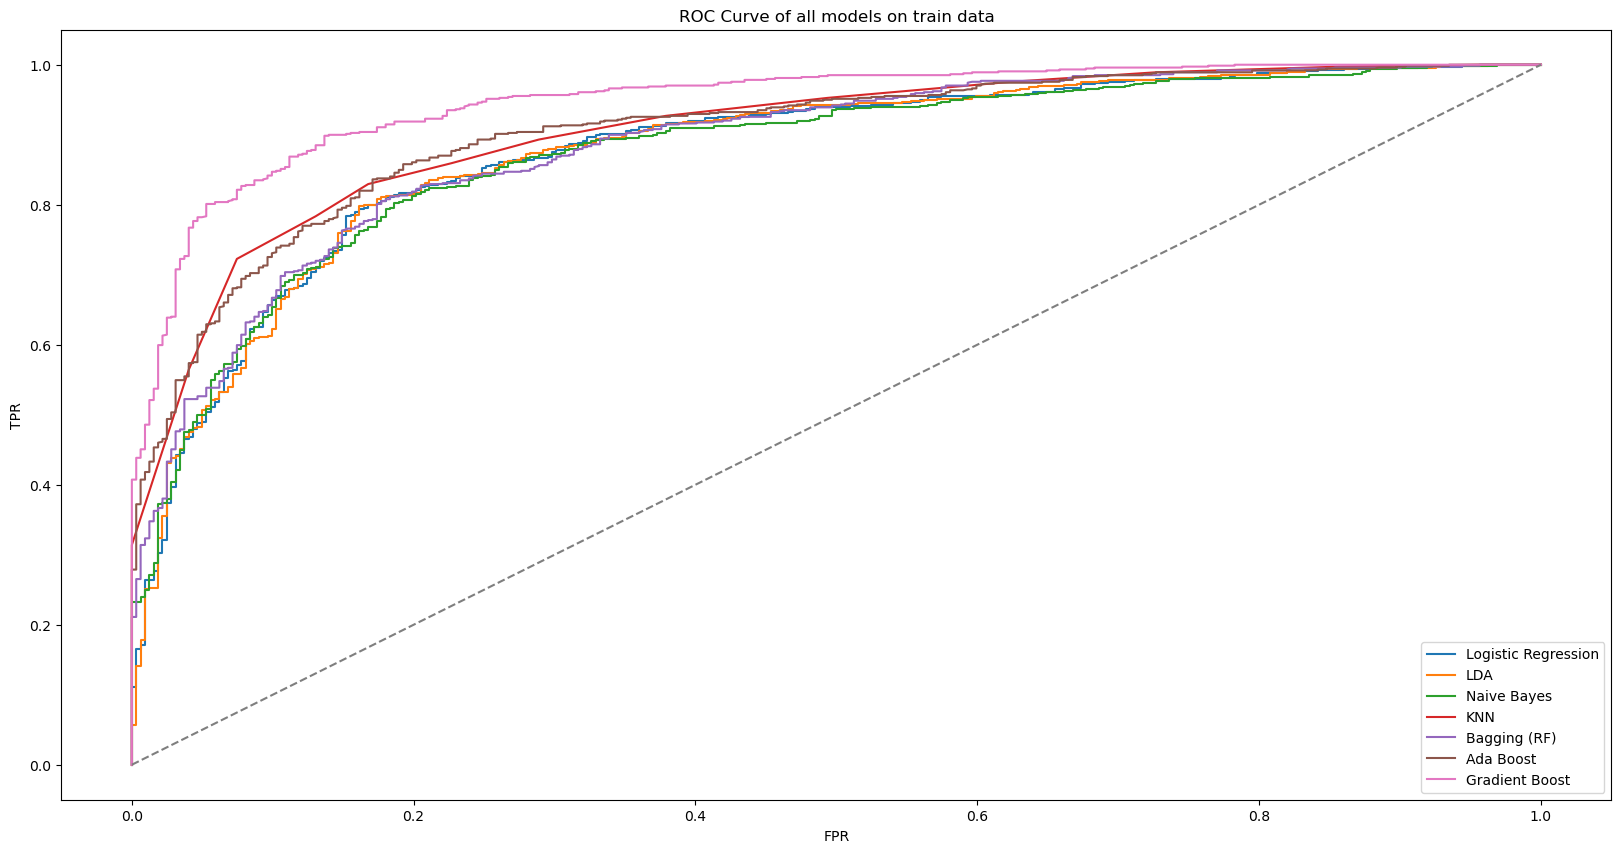

In [149]:
plt.figure(figsize = [20, 10])
plt.title('ROC Curve of all models on train data')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(LR_train_fpr, LR_train_tpr)
plt.plot(LDA_train_fpr, LDA_train_tpr)
plt.plot(NB_train_fpr, NB_train_tpr)
plt.plot(KNN_train_fpr, KNN_train_tpr)
plt.plot(RF_train_fpr, RF_train_tpr)
plt.plot(AB_train_fpr, AB_train_tpr)
plt.plot(GB_train_fpr, GB_train_tpr)
plt.plot([0,1], [0,1], linestyle = '--')

plt.legend(model_names)
plt.show()

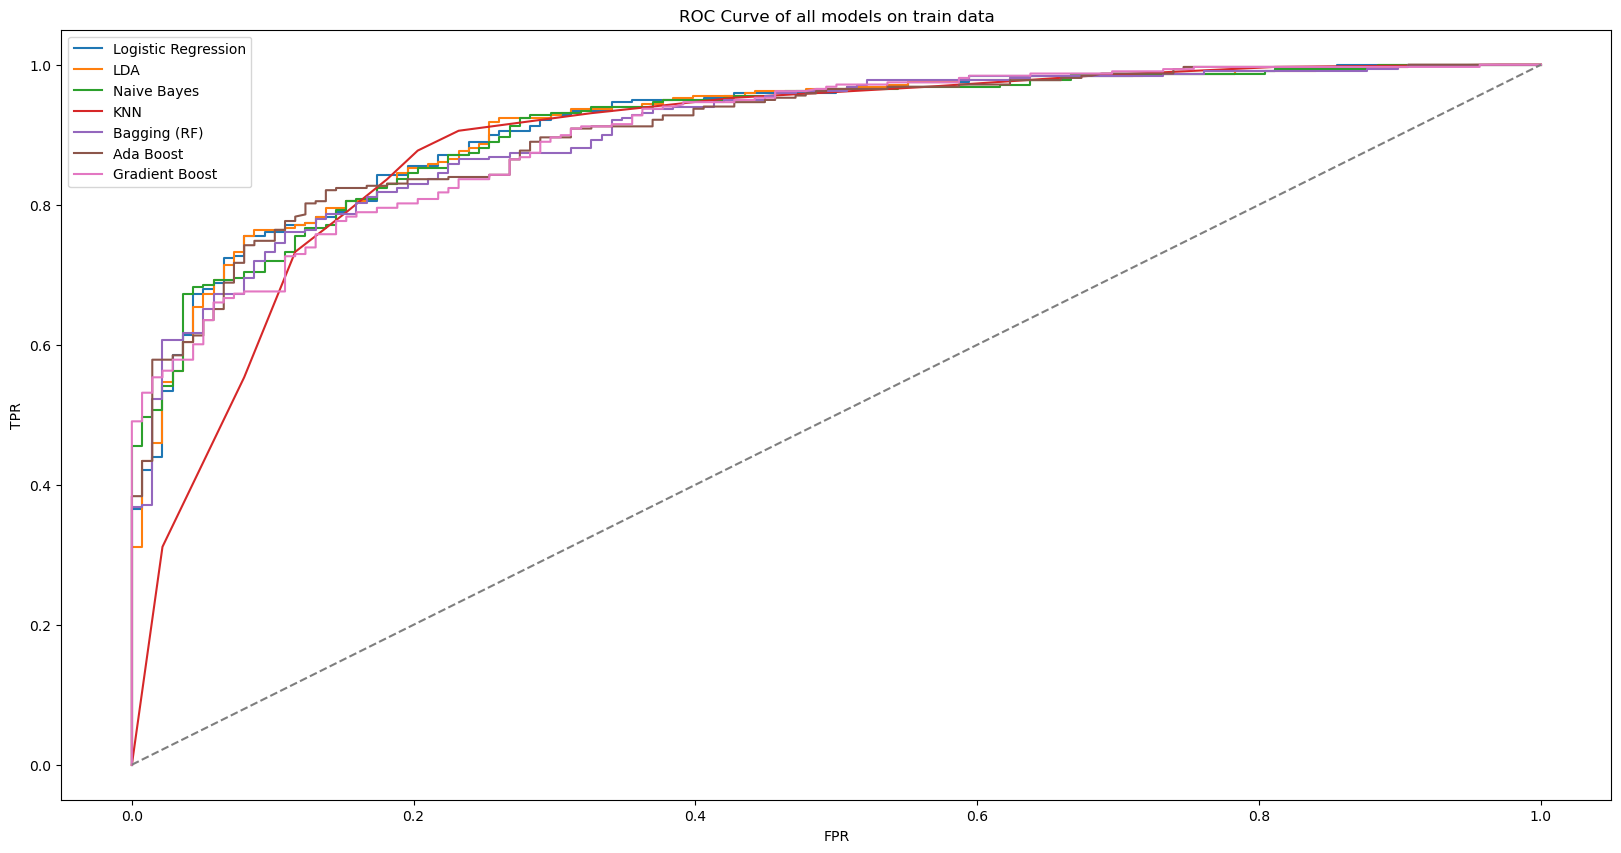

In [150]:
plt.figure(figsize = [20, 10])
plt.title('ROC Curve of all models on train data')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot(LR_test_fpr, LR_test_tpr)
plt.plot(LDA_test_fpr, LDA_test_tpr)
plt.plot(NB_test_fpr, NB_test_tpr)
plt.plot(KNN_test_fpr, KNN_test_tpr)
plt.plot(RF_test_fpr, RF_test_tpr)
plt.plot(AB_test_fpr, AB_test_tpr)
plt.plot(GB_test_fpr, GB_test_tpr)
plt.plot([0,1], [0,1], linestyle = '--')

plt.legend(model_names)
plt.show()

In [151]:
#actual vs predicted
Y_compare = pd.DataFrame({'Actual': np.hstack((y_train, y_test)), 'Predicted': np.hstack((ytrain_predict_rf, ytest_predict_rf))})
Y_sum = pd.DataFrame({'Labour': [(Y_compare['Actual'] == 0).sum(), (Y_compare['Predicted'] == 0).sum()],
                      'Conservative': [(Y_compare['Actual'] == 1).sum(), (Y_compare['Predicted'] == 1).sum()]}, index = ['Actual', 'Predicted'])

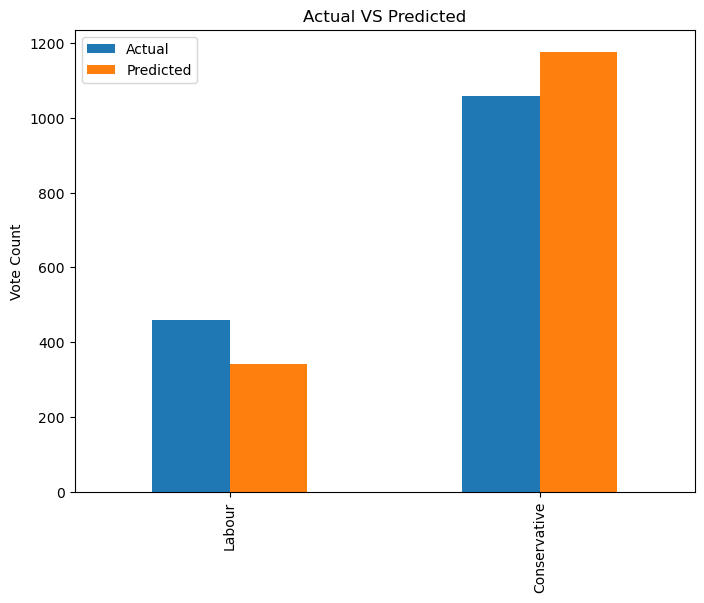

In [152]:
Y_sum.T.plot.bar(figsize = [8, 6]);
plt.title('Actual VS Predicted')
plt.ylabel('Vote Count');

In [153]:
# Sample voter information
test_sample = [(4,6,10,8,20,11,7,21)]
#Create a DataFrame object
test_df = pd.DataFrame(test_sample, columns = ['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'])

In [154]:
test_predict_LR =  LR.predict(test_df)
test_predict_LDA = LDA.predict(test_df)
test_predict_KNN = KNN_model.predict(test_df) 
test_predict_NB = NB_model.predict(test_df)
test_predict_BG = Bagging_model.predict(test_df)
test_predict_AB = abcl.predict(test_df)
test_predict_GB = gbcl.predict(test_df)

In [156]:

outcome_LR = pd.DataFrame(test_predict_LR)
outcome_LR[0]=np.where(outcome_LR[0] == 1," labour party","conservative party")
outcome_LDA = pd.DataFrame(test_predict_LDA)
outcome_LDA[0]=np.where(outcome_LDA[0] == 1," labour party","conservative party")
outcome_KNN = pd.DataFrame(test_predict_KNN)
outcome_KNN[0]=np.where(outcome_KNN[0] == 1,"labour party","conservative party")
outcome_NB = pd.DataFrame(test_predict_NB)
outcome_NB[0]=np.where(outcome_NB[0] == 1,"labour party","conservative party")
outcome_BG = pd.DataFrame(test_predict_BG)
outcome_BG[0]=np.where(outcome_BG[0] == 1,"labour party","conservative party")
outcome_AB = pd.DataFrame(test_predict_AB)
outcome_AB[0]=np.where(outcome_AB[0] == 1,"labour party","conservative party")
outcome_GB = pd.DataFrame(test_predict_GB)
outcome_GB[0]=np.where(outcome_GB[0] == 1,"labour party","conservative party")

In [157]:
outcome = [outcome_LR,outcome_LDA,outcome_KNN,outcome_NB,outcome_BG,
               outcome_AB,outcome_GB]
outcome1 = pd.concat(outcome)
outcome1[" Prediction"] = outcome1.copy()
outcome1.drop(0,axis=1,inplace=True)
Models = ['Logistic Regression', 'Linear Discriminant Analaysis ', 'K-Nearest Neighbour',
              'Naive Bayes','Bagging(with Random Forest)', 'Adaptive Boosting ',
              'Gradient Boosting']
outcome1["Model"] = Models
outcome1.set_index("Model", inplace = True)

In [158]:
#Printing the results
print("For the sample voter details provided, the following conclusions are made by the models:\n",outcome1)

For the sample voter details provided, the following conclusions are made by the models:
                                         Prediction
Model                                             
Logistic Regression             conservative party
Linear Discriminant Analaysis   conservative party
K-Nearest Neighbour                   labour party
Naive Bayes                           labour party
Bagging(with Random Forest)           labour party
Adaptive Boosting                     labour party
Gradient Boosting               conservative party


In [159]:
outcome1

Prediction
Model                                             
Logistic Regression             conservative party
Linear Discriminant Analaysis   conservative party
K-Nearest Neighbour                   labour party
Naive Bayes                           labour party
Bagging(with Random Forest)           labour party
Adaptive Boosting                     labour party
Gradient Boosting               conservative party

## Problem Statement-2 Text Analytics

- President Franklin D. Roosevelt in 1941
- President John F. Kennedy in 1961
- President Richard Nixon in 197373

##### Code Snippet to extract the three speeches:
- import nltk
- nltk.download('inaugural')
- from nltk.corpus import inaugural
- inaugural.fileids()
- inaugural.raw('1941-Roosevelt.txt')
- inaugural.raw('1961-Kennedy.txt')
- inaugural.raw('1973-Nixon.txt').txt')

In [161]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 262.6 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 365.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 438.1 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 612.6 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 692.4 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/300.2 kB 853.3 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 807.6 kB/s eta 0:00:00


In [162]:
# Import Neccessary package
import os

from wordcloud import WordCloud
# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np 
import pandas as pd 

# For Visualisation import ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns

import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import string # this is used for string manipulations
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  

In [164]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Speech_1 = inaugural.raw('1941-Roosevelt.txt')
Speech_2 = inaugural.raw('1961-Kennedy.txt')
Speech_3 = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [165]:
Speech_1

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [166]:
Speech_2

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [167]:
Speech_3

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [168]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### 2.1 Find the number of characters, words and sentences for the mentioned documents. 

In [169]:
speech = ['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']
for fileid in speech:
    num_chars = len(inaugural.raw(fileid))
    num_words = len(inaugural.words(fileid))
    num_sents = len(inaugural.sents(fileid))
    print(pd.DataFrame({fileid:[num_chars,num_words,num_sents]},index=['Character','Words','Sentences']))

           1941-Roosevelt.txt
Character                7571
Words                    1536
Sentences                  68
           1961-Kennedy.txt
Character              7618
Words                  1546
Sentences                52
           1973-Nixon.txt
Character            9991
Words                2028
Sentences              69


In [170]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 2.2 Remove all the stopwords from the three speeches.

In [171]:
special_characters=['--'] + list(string.punctuation)
# Assign stopwords and special characters to new variable
stop = stopwords.words('english') + special_characters
#Convert all the words to lowercase and store it in a new variables
all_words_speech1 = (w.lower() for w in inaugural.words(fileids='1941-Roosevelt.txt'))
all_words_speech2 = (w.lower() for w in inaugural.words(fileids='1961-Kennedy.txt'))
all_words_speech3 = (w.lower() for w in inaugural.words(fileids='1973-Nixon.txt'))
#Remove stopwords and special characters for all the three speeches
all_words_clean_speech1 = [word for word in all_words_speech1 if word not in stop]
all_words_clean_speech2 = [word for word in all_words_speech2 if word not in stop]
all_words_clean_speech3 = [word for word in all_words_speech3 if word not in stop]

In [172]:
all_words_clean_speech1

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplai

In [173]:
all_words_clean_speech2

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alike'

In [174]:
all_words_clean_speech3

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',


### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (After removing the stopwords)

In [176]:
speech_df1 = nltk.FreqDist(all_words_clean_speech1)
speech_df1 = pd.DataFrame.from_dict(speech_df1,orient='index')
speech_df1 = speech_df1.rename(columns={0:'Count'})
speech_df1.sort_values(by=['Count'],ascending=False, inplace=True)
print("Most Frequent words in 1941-Roosevelt Speech")
speech_df1.head(5)

Most Frequent words in 1941-Roosevelt Speech


Count
nation        12
know          10
spirit         9
democracy      9
life           9

In [186]:
speech_df3 = nltk.FreqDist(all_words_clean_speech3)
speech_df3 = pd.DataFrame.from_dict(speech_df3,orient='index')
speech_df3 = speech_df3.rename(columns={0:'Count'})
speech_df3.sort_values(by=['Count'],ascending=False, inplace=True)
print("Most Frequent words in 1961-Kennedy Speech")
speech_df3.head(5)

Most Frequent words in 1961-Kennedy Speech


Count
us          26
let         22
america     21
peace       19
world       18

In [178]:
speech_df2 = nltk.FreqDist(all_words_clean_speech2)
speech_df2 = pd.DataFrame.from_dict(speech_df2,orient='index')
speech_df2 = speech_df2.rename(columns={0:'Count'})
speech_df2.sort_values(by=['Count'],ascending=False, inplace=True)
print("Most Frequent words in 1961-Kennedy Speech")
speech_df2.head(5)

Most Frequent words in 1961-Kennedy Speech


Count
let       16
us        12
sides      8
world      8
new        7

### 2.4 Plot the word cloud of each of the three speeches. (After removing the stopwords).

In [179]:
wc_1 = ' '.join(all_words_clean_speech1)
wc_2 = ' '.join(all_words_clean_speech2)
wc_3 = ' '.join(all_words_clean_speech3)

Word Cloud for 1941-Roosevelt Speech (after cleaning)!!


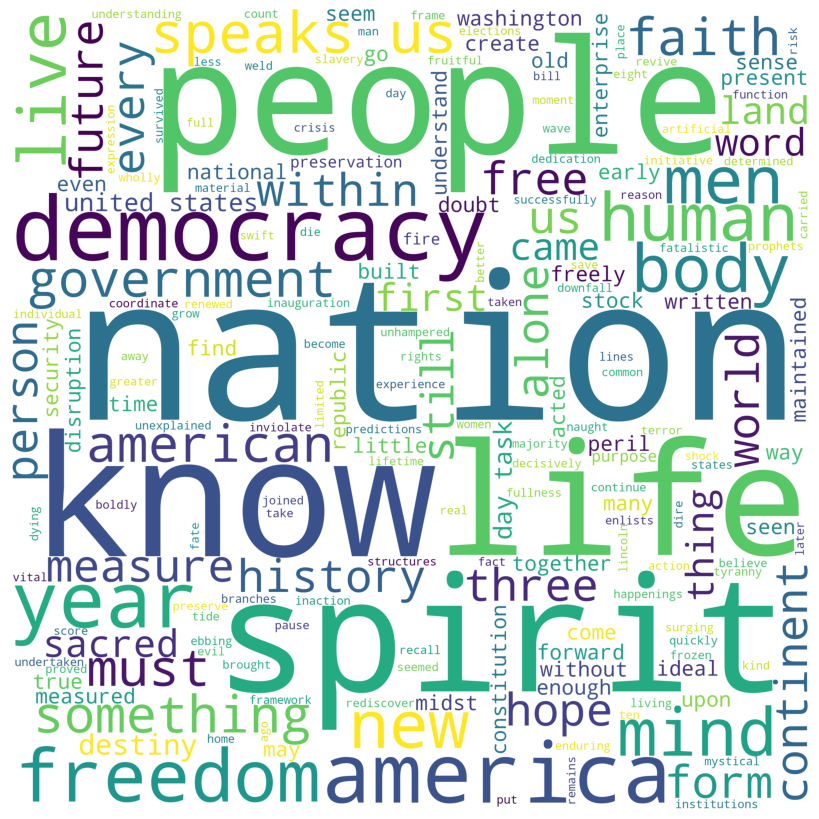

In [180]:
# Word Cloud for 1941-Roosevelt Speech
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=27).generate(wc_1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1941-Roosevelt Speech (after cleaning)!!")
plt.show()

Word Cloud for 1961-Kennedy Speech (after cleaning)!!


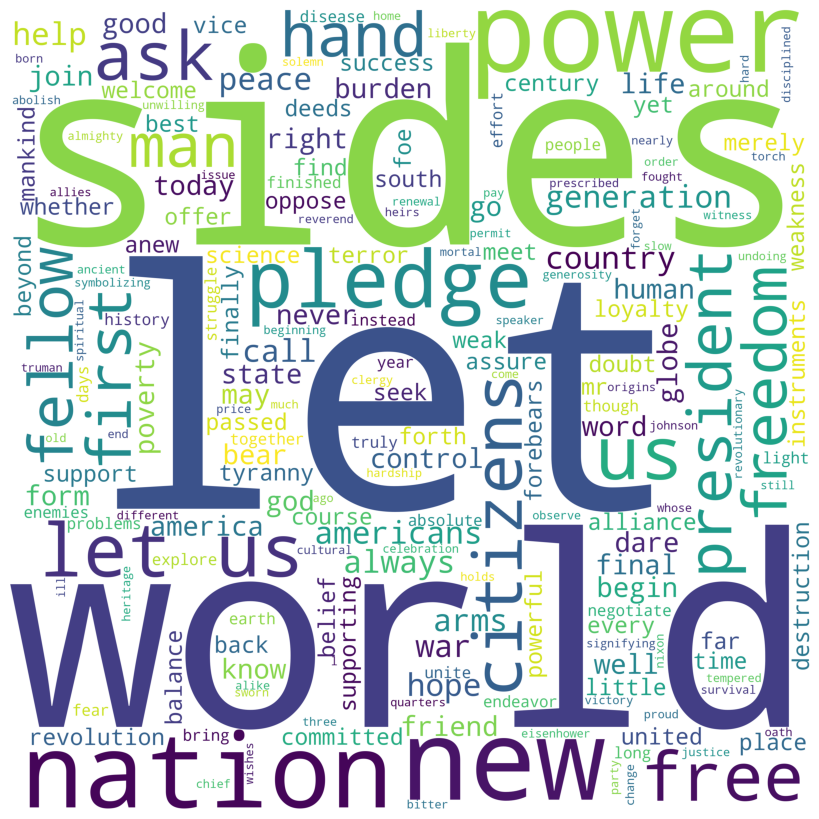

In [182]:
# Word Cloud for 1961-Kennedy Speech
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=27).generate(wc_2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1961-Kennedy Speech (after cleaning)!!")
plt.show()

Word Cloud for 1973-Nixon Speech (after cleaning)!!


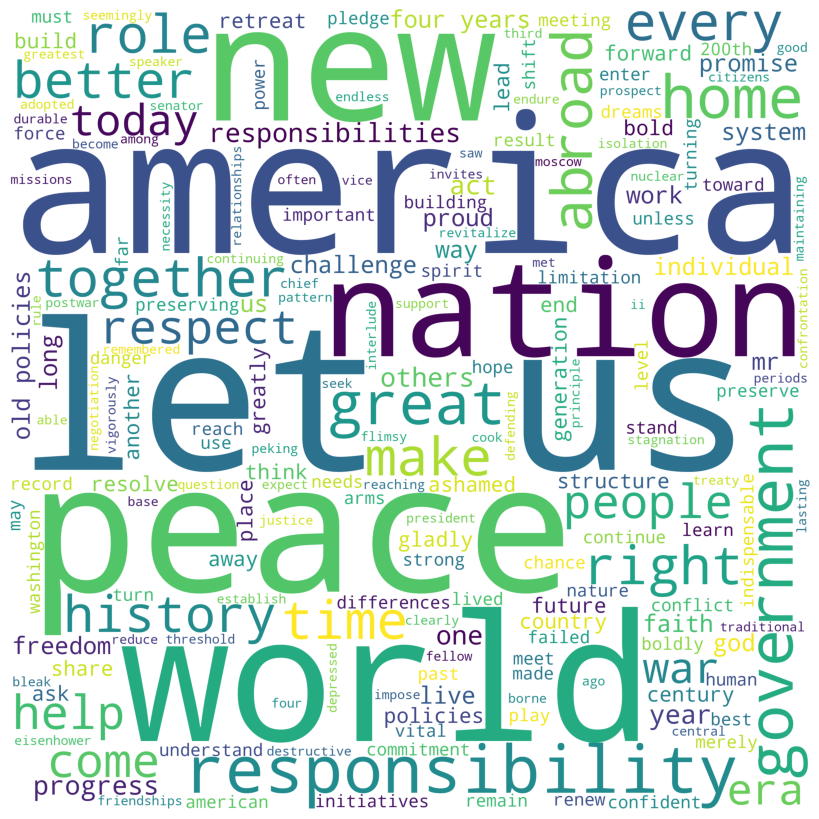

In [184]:
# Word Cloud for 1973-Nixon Speech
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=27).generate(wc_3) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1973-Nixon Speech (after cleaning)!!")
plt.show()